

<img src="../../../Imagenes/EDAPORTADA2.jpg" alt="Texto alternativo" width="2100" height="900"/>

### Predicion de partidos de fútbol de la liga española

- Los datos obtenidos para este dataset son de la siguiente página:
    - www.stathead.com

- El tamaño del dataset es de 13929 Datos  
- Resultados de fútbol de la liga española desde la temporada 2000/2001 hasta 2022/2023  


## **LIMPIEZA DE DATOS DE LO DATOS OBTENIDOS**


<img src="../../../Imagenes/limpiezadatos.jpg" alt="Texto alternativo" width="2000" height="400"/>


In [131]:
import pandas as pd
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import sys
import os

ruta_carpeta = '/Users/raul_/Desktop/PBREAK/Funciones/'
sys.path.append(ruta_carpeta) 
from Funciones import encuentros_entre_equipos
from Funciones import filter_columns_by_correlation
from Funciones import remove_accents
from Funciones import determinar_resultado
from pandas.plotting import scatter_matrix
from Funciones import *
import matplotlib.pyplot as plt




#### CARGA DEL CSV PARA CONVERTIRLO EN DATAFRAME

In [132]:
resultados = pd.read_csv("RESULTADOSPARTIDOS2000-2023.csv", encoding='latin1')

In [133]:
len(resultados)

17480

In [134]:
resultados.head(10)

,Rk,Team,Date,Unnamed: 3,Opp,Comp,Result,GF,GA,GD,Poss,G-PK,PK,PKatt,PKm,Match Report
0,1,Valencia,2000-09-09,@,Real Madrid,es La Liga,L 1-2,1,2,-1,NaN,0,1,NaN,NaN,Match Report
1,2,Real Madrid,2000-09-09,NaN,Valencia,es La Liga,W 2-1,2,1,1,NaN,2,0,NaN,NaN,Match Report
2,3,Espanyol,2000-09-09,@,Zaragoza,es La Liga,W 2-1,2,1,1,NaN,1,1,NaN,NaN,Match Report
3,4,Real Sociedad,2000-09-09,NaN,Racing Sant,es La Liga,D 2-2,2,2,0,NaN,1,1,NaN,NaN,Match Report
4,5,La Coruña,2000-09-09,NaN,Athletic Club,es La Liga,W 2-0,2,0,2,NaN,1,1,NaN,NaN,Match Report
5,6,Zaragoza,2000-09-09,NaN,Espanyol,es La Liga,L 1-2,1,2,-1,NaN,1,0,NaN,NaN,Match Report
6,7,Barcelona,2000-09-09,NaN,Málaga,es La Liga,W 2-1,2,1,1,NaN,2,0,NaN,NaN,Match Report
7,8,Málaga,2000-09-09,@,Barcelona,es La Liga,L 1-2,1,2,-1,NaN,1,0,NaN,NaN,Match Report
8,9,Racing Sant,2000-09-09,@,Real Sociedad,es La Liga,D 2-2,2,2,0,NaN,1,1,NaN,NaN,Match Report
9,10,Athletic Club,2000-09-09,@,La Coruña,es La Liga,L 0-2,0,2,-2,NaN,0,0,NaN,NaN,Match Report




<img src="../../../Imagenes/Explicacioncolumna.jpg" alt="Texto alternativo" width="1000" height="400"/>

 #### EXPLICACION DE CADA COLUMNA

- 'Rk',
- 'Team', EQUIPO LOCAL
- 'Date', FECHA
- 'Unnamed: 3', DONDE ESTA EL ARROBA
- 'Opp', EQUIPO VISITANTE
- 'Comp', LIGA
- 'Result', RESULTADO PARA LIMPIAR BIEN 
- 'GF', GOLES DEL LOCAL
- 'GA', GOLES VISITANTE
- 'GD', DIFERENCIA DE GOLES
- 'Poss', POSESION SE VA A BORRAR DE AQUI
- 'G-PK', GOLES QUE NO HAN SIDO DE PENALTI
- 'PK', COLUMNAS A BORRAR SOBRE PENALTI 
- 'PKatt',
- 'PKm',
- 'Match Report'

In [135]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rk            17480 non-null  int64  
 1   Team          17480 non-null  object 
 2   Date          17480 non-null  object 
 3   Unnamed: 3    8740 non-null   object 
 4   Opp           17480 non-null  object 
 5   Comp          17480 non-null  object 
 6   Result        17480 non-null  object 
 7   GF            17480 non-null  int64  
 8   GA            17480 non-null  int64  
 9   GD            17480 non-null  int64  
 10  Poss          6840 non-null   float64
 11  G-PK          17480 non-null  int64  
 12  PK            17480 non-null  int64  
 13  PKatt         6840 non-null   float64
 14  PKm           6840 non-null   float64
 15  Match Report  17480 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 2.1+ MB


#### VEMOS QUE LAS COLUMNAS CON @ SON DUPLICADOS Y LAS BORRAMOS

In [136]:
equipos_duplicados = resultados.loc[resultados["Unnamed: 3"] == "@"]
resultados = resultados.drop(equipos_duplicados.index)

In [137]:
resultados.head(10)

,Rk,Team,Date,Unnamed: 3,Opp,Comp,Result,GF,GA,GD,Poss,G-PK,PK,PKatt,PKm,Match Report
1,2,Real Madrid,2000-09-09,NaN,Valencia,es La Liga,W 2-1,2,1,1,NaN,2,0,NaN,NaN,Match Report
3,4,Real Sociedad,2000-09-09,NaN,Racing Sant,es La Liga,D 2-2,2,2,0,NaN,1,1,NaN,NaN,Match Report
4,5,La Coruña,2000-09-09,NaN,Athletic Club,es La Liga,W 2-0,2,0,2,NaN,1,1,NaN,NaN,Match Report
5,6,Zaragoza,2000-09-09,NaN,Espanyol,es La Liga,L 1-2,1,2,-1,NaN,1,0,NaN,NaN,Match Report
6,7,Barcelona,2000-09-09,NaN,Málaga,es La Liga,W 2-1,2,1,1,NaN,2,0,NaN,NaN,Match Report
10,11,Osasuna,2000-09-10,NaN,Celta Vigo,es La Liga,L 0-2,0,2,-2,NaN,0,0,NaN,NaN,Match Report
13,14,Numancia,2000-09-10,NaN,Oviedo,es La Liga,W 1-0,1,0,1,NaN,1,0,NaN,NaN,Match Report
15,16,Mallorca,2000-09-10,NaN,Valladolid,es La Liga,D 1-1,1,1,0,NaN,1,0,NaN,NaN,Match Report
17,18,Las Palmas,2000-09-10,NaN,Alavés,es La Liga,L 0-3,0,3,-3,NaN,0,0,NaN,NaN,Match Report
19,20,Villarreal,2000-09-10,NaN,Rayo Vallecano,es La Liga,L 1-5,1,5,-4,NaN,1,0,NaN,NaN,Match Report


#### BORRAMOS LAS COLUMNAS NO NECESARIAS Y QUE TIENEN NULOS. REALMENTE SOLO NOS QUEDAMOS CON LOS EQUIPOS, FECHA Y RESULTADO

In [138]:
resultados.drop(columns=["Unnamed: 3","Poss","G-PK","PK","PKatt","PKm","Match Report","Rk"], inplace=True)

In [139]:
resultados.head(10)

,Team,Date,Opp,Comp,Result,GF,GA,GD
1,Real Madrid,2000-09-09,Valencia,es La Liga,W 2-1,2,1,1
3,Real Sociedad,2000-09-09,Racing Sant,es La Liga,D 2-2,2,2,0
4,La Coruña,2000-09-09,Athletic Club,es La Liga,W 2-0,2,0,2
5,Zaragoza,2000-09-09,Espanyol,es La Liga,L 1-2,1,2,-1
6,Barcelona,2000-09-09,Málaga,es La Liga,W 2-1,2,1,1
10,Osasuna,2000-09-10,Celta Vigo,es La Liga,L 0-2,0,2,-2
13,Numancia,2000-09-10,Oviedo,es La Liga,W 1-0,1,0,1
15,Mallorca,2000-09-10,Valladolid,es La Liga,D 1-1,1,1,0
17,Las Palmas,2000-09-10,Alavés,es La Liga,L 0-3,0,3,-3
19,Villarreal,2000-09-10,Rayo Vallecano,es La Liga,L 1-5,1,5,-4


In [140]:
resultados.reset_index(drop=True, inplace=True)

In [141]:
resultados.head(10)

,Team,Date,Opp,Comp,Result,GF,GA,GD
0,Real Madrid,2000-09-09,Valencia,es La Liga,W 2-1,2,1,1
1,Real Sociedad,2000-09-09,Racing Sant,es La Liga,D 2-2,2,2,0
2,La Coruña,2000-09-09,Athletic Club,es La Liga,W 2-0,2,0,2
3,Zaragoza,2000-09-09,Espanyol,es La Liga,L 1-2,1,2,-1
4,Barcelona,2000-09-09,Málaga,es La Liga,W 2-1,2,1,1
5,Osasuna,2000-09-10,Celta Vigo,es La Liga,L 0-2,0,2,-2
6,Numancia,2000-09-10,Oviedo,es La Liga,W 1-0,1,0,1
7,Mallorca,2000-09-10,Valladolid,es La Liga,D 1-1,1,1,0
8,Las Palmas,2000-09-10,Alavés,es La Liga,L 0-3,0,3,-3
9,Villarreal,2000-09-10,Rayo Vallecano,es La Liga,L 1-5,1,5,-4


#### Convertimos la columna Date en tipo Datetime

In [142]:
resultados.Date = pd.to_datetime(resultados.Date)

In [143]:
resultados.Team.unique()

array(['Real Madrid', 'Real Sociedad', 'La Coruña', 'Zaragoza',
       'Barcelona', 'Osasuna', 'Numancia', 'Mallorca', 'Las Palmas',
       'Villarreal', 'Valladolid', 'Málaga', 'Valencia', 'Athletic Club',
       'Racing Sant', 'Oviedo', 'Rayo Vallecano', 'Espanyol', 'Alavés',
       'Celta Vigo', 'Sevilla', 'Tenerife', 'Betis', 'Recreativo',
       'Atlético Madrid', 'Albacete', 'Real Murcia', 'Getafe', 'Levante',
       'Cádiz', 'Gimnàstic', 'Almería', 'Sporting Gijón', 'Xerez',
       'Hércules', 'Granada', 'Elche', 'Eibar', 'Córdoba', 'Leganés',
       'Girona', 'Huesca'], dtype=object)

##### Fucion para quitar acentos y quitar la Ñ 

In [144]:
resultados = resultados.map(remove_accents)

In [145]:
resultados.Team.unique()

array(['Real Madrid', 'Real Sociedad', 'La Coruna', 'Zaragoza',
       'Barcelona', 'Osasuna', 'Numancia', 'Mallorca', 'Las Palmas',
       'Villarreal', 'Valladolid', 'Malaga', 'Valencia', 'Athletic Club',
       'Racing Sant', 'Oviedo', 'Rayo Vallecano', 'Espanyol', 'Alaves',
       'Celta Vigo', 'Sevilla', 'Tenerife', 'Betis', 'Recreativo',
       'Atletico Madrid', 'Albacete', 'Real Murcia', 'Getafe', 'Levante',
       'Cadiz', 'Gimnastic', 'Almeria', 'Sporting Gijon', 'Xerez',
       'Hercules', 'Granada', 'Elche', 'Eibar', 'Cordoba', 'Leganes',
       'Girona', 'Huesca'], dtype=object)

In [146]:
resultados.drop_duplicates(subset=resultados.columns, inplace=True)


##### VAMOS A CAMBIAR LOS NOMBRES DE LAS COLUMNAS

In [147]:
resultados.rename(columns={"Team" : "Local",
                           "Opp":"Visitante",
                           "Comp" : "Competicion",
                           "GF" : "Goles_Local",
                           "GA" : "Goles_Visitantes",
                           "GD" : "Diferencia_Goles"
                           }, inplace=True)

In [148]:
# Transformar los campos a tipo entero
resultados['Goles_Local'] = resultados['Goles_Local'].astype(int)
resultados['Goles_Visitantes'] = resultados['Goles_Visitantes'].astype(int)
resultados['Diferencia_Goles'] = resultados['Diferencia_Goles'].astype(int)

###              INGENERIA DE DATOS

<img src="../../../Imagenes/ingdatos.jpg" alt="Texto Datos" width="1800" height="500"/>



- A partir de aqui vamos abarcar lo siguiente:
    - Creación de columnas nuevas.
    - Ver sus correlaciones.
    - Experimentar con combinaciones de atributos.

### Funcion para determinar que equipo ha ganado

In [149]:
resultados["Resultado"] = resultados.apply(determinar_resultado, axis=1)
resultados.drop(columns=["Result","Diferencia_Goles"], inplace=True)

In [150]:
orden_columnas = ["Date", "Local", "Goles_Local","Visitante", "Goles_Visitantes","Resultado"]

In [151]:
resultados = resultados[orden_columnas]

In [152]:
resultados.head(10)

,Date,Local,Goles_Local,Visitante,Goles_Visitantes,Resultado
0,2000-09-09,Real Madrid,2,Valencia,1,Local
1,2000-09-09,Real Sociedad,2,Racing Sant,2,Empate
2,2000-09-09,La Coruna,2,Athletic Club,0,Local
3,2000-09-09,Zaragoza,1,Espanyol,2,Visitante
4,2000-09-09,Barcelona,2,Malaga,1,Local
5,2000-09-10,Osasuna,0,Celta Vigo,2,Visitante
6,2000-09-10,Numancia,1,Oviedo,0,Local
7,2000-09-10,Mallorca,1,Valladolid,1,Empate
8,2000-09-10,Las Palmas,0,Alaves,3,Visitante
9,2000-09-10,Villarreal,1,Rayo Vallecano,5,Visitante


### Generar temporada y jornada, sabiendo la duracion de las temporadas de unos 8 meses aproximados, y para jornada que tiene que ser 10 partidos por jornada

In [153]:

resultados['Date'] = pd.to_datetime(resultados['Date'])

# Creeamos Temporada como columna
resultados['Temporada'] = resultados['Date'].apply(lambda x: x.year if x.month >= 8 else x.year - 1)

# Ordenamos por fecha
resultados = resultados.sort_values(by='Date')

# Creamos Jornada
resultados['Jornada'] = resultados.groupby('Temporada').cumcount() // 10 + 1

resultados.reset_index(drop=True, inplace=True)

In [154]:
resultados['Temporada'].value_counts().sort_index()

Temporada
2000    380
2001    380
2002    379
2003    380
2004    380
2005    380
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
2020    380
2021    380
2022    380
Name: count, dtype: int64

In [155]:
resultados.head(5)

,Date,Local,Goles_Local,Visitante,Goles_Visitantes,Resultado,Temporada,Jornada
0,2000-09-09,Real Madrid,2,Valencia,1,Local,2000,1
1,2000-09-09,Real Sociedad,2,Racing Sant,2,Empate,2000,1
2,2000-09-09,La Coruna,2,Athletic Club,0,Local,2000,1
3,2000-09-09,Zaragoza,1,Espanyol,2,Visitante,2000,1
4,2000-09-09,Barcelona,2,Malaga,1,Local,2000,1


In [156]:
resultados['Temporada'].value_counts().sort_index()

Temporada
2000    380
2001    380
2002    379
2003    380
2004    380
2005    380
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
2020    380
2021    380
2022    380
Name: count, dtype: int64

#### Aqui generamos la suma en cada jornada de los 3 puntos o 1 punto dependiendo del resultado, primero creamos las columnas correspondientes con valor 0

In [157]:
resultados["Puntos_Local"] = 0
resultados["Puntos_Visitantes"] = 0

In [158]:

for i, row in resultados.iterrows():
    if row['Resultado'] == "Local":
        resultados.at[i, 'Puntos_Local'] += 3
    elif row['Resultado'] == "Visitante":
        resultados.at[i, 'Puntos_Visitantes'] += 3
    else:
        resultados.at[i, 'Puntos_Local'] += 1
        resultados.at[i, 'Puntos_Visitantes'] += 1

### Se crea dos dataframe que recogen los puntos de los equipos visitantes y local por jornada y temporada.
Que posteriormente se juntan en un solo dataframe

In [159]:

# Supongamos que 'resultados' es tu DataFrame original
# Crear DataFrames separados para los equipos locales y visitantes
df_local = resultados[['Temporada', 'Jornada', 'Local', 'Puntos_Local']].rename(columns={'Local': 'Equipo', 'Puntos_Local': 'Puntos'})
df_visitante = resultados[['Temporada', 'Jornada', 'Visitante', 'Puntos_Visitantes']].rename(columns={'Visitante': 'Equipo', 'Puntos_Visitantes': 'Puntos'})

# Unir ambos DataFrames
df_puntos = pd.concat([df_local, df_visitante])

# Ordenar por temporada, equipo y jornada
df_puntos = df_puntos.sort_values(by=['Temporada', 'Equipo', 'Jornada'])

# Calcular la suma acumulada de puntos para cada equipo en cada temporada, excluyendo la jornada actual
df_puntos['Puntos_Acumulados'] = df_puntos.groupby(['Temporada', 'Equipo'])['Puntos'].shift().fillna(0).groupby(df_puntos['Temporada']).cumsum()

# Verificar el DataFrame resultante
print(df_puntos)


      Temporada  Jornada           Equipo  Puntos  Puntos_Acumulados
7          2000        1           Alaves       3                0.0
16         2000        2           Alaves       0                3.0
21         2000        3           Alaves       1                3.0
39         2000        4           Alaves       3                4.0
48         2000        5           Alaves       1                7.0
57         2000        6           Alaves       3                8.0
67         2000        7           Alaves       3               11.0
75         2000        8           Alaves       0               14.0
86         2000        9           Alaves       3               14.0
95         2000       10           Alaves       0               17.0
100        2000       11           Alaves       1               17.0
114        2000       12           Alaves       0               18.0
125        2000       13           Alaves       3               18.0
133        2000       14          

In [160]:
df_puntos.head(20)

,Temporada,Jornada,Equipo,Puntos,Puntos_Acumulados
7,2000,1,Alaves,3,0.0
16,2000,2,Alaves,0,3.0
21,2000,3,Alaves,1,3.0
39,2000,4,Alaves,3,4.0
48,2000,5,Alaves,1,7.0
57,2000,6,Alaves,3,8.0
67,2000,7,Alaves,3,11.0
75,2000,8,Alaves,0,14.0
86,2000,9,Alaves,3,14.0
95,2000,10,Alaves,0,17.0


### Ahora cogemos el dataframe que hemos generado y vamos a juntarlo con el original nuestro haciendo que por cada jornada, sesion y equipo añadamos sus puntos totales por jornada.

In [161]:

# Supongamos que 'resultados' es tu DataFrame original
# Crear DataFrames separados para los equipos locales y visitantes
df_local = resultados[['Temporada', 'Jornada', 'Local', 'Puntos_Local']].rename(columns={'Local': 'Equipo', 'Puntos_Local': 'Puntos'})
df_visitante = resultados[['Temporada', 'Jornada', 'Visitante', 'Puntos_Visitantes']].rename(columns={'Visitante': 'Equipo', 'Puntos_Visitantes': 'Puntos'})

# Unir ambos DataFrames
df_puntos = pd.concat([df_local, df_visitante])

# Ordenar por temporada, equipo y jornada
df_puntos = df_puntos.sort_values(by=['Temporada', 'Equipo', 'Jornada'])

# Calcular la suma acumulada de puntos para cada equipo en cada temporada, excluyendo la jornada actual
df_puntos['Puntos_Acumulados'] = df_puntos.groupby(['Temporada', 'Equipo'])['Puntos'].shift().fillna(0).groupby([df_puntos['Temporada'], df_puntos['Equipo']]).cumsum()

# Crear un DataFrame para los puntos acumulados de los equipos locales
df_puntos_local = df_puntos.rename(columns={'Equipo': 'Local', 'Puntos_Acumulados': 'Puntos_Acumulados_Local'})

# Combinar los puntos acumulados locales con el DataFrame original
resultados = resultados.merge(df_puntos_local[['Temporada', 'Jornada', 'Local', 'Puntos_Acumulados_Local']],
                              on=['Temporada', 'Jornada', 'Local'], how='left')

# Crear un DataFrame para los puntos acumulados de los equipos visitantes
df_puntos_visitante = df_puntos.rename(columns={'Equipo': 'Visitante', 'Puntos_Acumulados': 'Puntos_Acumulados_Visitantes'})

# Combinar los puntos acumulados visitantes con el DataFrame original
resultados = resultados.merge(df_puntos_visitante[['Temporada', 'Jornada', 'Visitante', 'Puntos_Acumulados_Visitantes']],
                              on=['Temporada', 'Jornada', 'Visitante'], how='left')




In [162]:
resultados['Temporada'].value_counts().sort_index()

Temporada
2000    414
2001    391
2002    507
2003    386
2004    419
2005    405
2006    405
2007    430
2008    380
2009    392
2010    380
2011    395
2012    409
2013    395
2014    407
2015    419
2016    495
2017    429
2018    406
2019    440
2020    662
2021    628
2022    407
Name: count, dtype: int64

### Aqui lo que hacemos es Generar un data para almacenar las posiciones dependiendo de los puntos de cada equipo por jornada.

In [163]:
# Crear un DataFrame para almacenar las posiciones en la liga
df_posiciones = pd.DataFrame()

# Iterar sobre cada temporada
for season in df_puntos['Temporada'].unique():
    
    df_season = df_puntos[df_puntos['Temporada'] == season]
    
    # Iterar sobre cada jornada
    for jornada in df_season['Jornada'].unique():
        
        df_jornada = df_season[df_season['Jornada'] == jornada]
        
        df_jornada = df_jornada.sort_values(by='Puntos_Acumulados', ascending=False).reset_index(drop=True)
        
        df_jornada['Posicion'] = df_jornada.index + 1
        
        # Agregar al DataFrame de posiciones
        df_posiciones = pd.concat([df_posiciones, df_jornada[['Temporada', 'Jornada', 'Equipo', 'Puntos_Acumulados', 'Posicion']]])

df_posiciones.head()


,Temporada,Jornada,Equipo,Puntos_Acumulados,Posicion
0,2000,1,Alaves,0.0,1
1,2000,1,Athletic Club,0.0,2
2,2000,1,Villarreal,0.0,3
3,2000,1,Valladolid,0.0,4
4,2000,1,Valencia,0.0,5


In [164]:
resultados['Temporada'].value_counts().sort_index()

Temporada
2000    414
2001    391
2002    507
2003    386
2004    419
2005    405
2006    405
2007    430
2008    380
2009    392
2010    380
2011    395
2012    409
2013    395
2014    407
2015    419
2016    495
2017    429
2018    406
2019    440
2020    662
2021    628
2022    407
Name: count, dtype: int64

In [165]:
# Eliminar duplicados en todo el conjunto de datos manteniendo una sola entrada por partido
resultados = resultados.drop_duplicates(subset=['Date', 'Local', 'Visitante'])

### Ahora juntamos el data de las posiciones por jornada al nuestro dataframe original

In [166]:
# Ahora vamos a combinar las posiciones calculadas con el DataFrame original
# Primero, renombrar columnas en df_posiciones para facilitar el merge
df_posiciones_local = df_posiciones.rename(columns={'Equipo': 'Local', 'Posicion': 'Posicion_Local'})
df_posiciones_visitante = df_posiciones.rename(columns={'Equipo': 'Visitante', 'Posicion': 'Posicion_Visitante'})

# Combinar las posiciones de los equipos locales con el DataFrame original
resultados = resultados.merge(df_posiciones_local[['Temporada', 'Jornada', 'Local', 'Posicion_Local']],
                                                             on=['Temporada', 'Jornada', 'Local'], how='left')

# Combinar las posiciones de los equipos visitantes con el DataFrame original
resultados = resultados.merge(df_posiciones_visitante[['Temporada', 'Jornada', 'Visitante', 'Posicion_Visitante']],
                                                                on=['Temporada', 'Jornada', 'Visitante'], how='left')



In [167]:


# Supongamos que 'resultados' es tu DataFrame original
# Crear DataFrames separados para los equipos locales y visitantes
df_local = resultados[['Temporada', 'Jornada', 'Local', 'Goles_Local']].rename(columns={'Local': 'Equipo', 'Goles_Local': 'Goles'})
df_visitante = resultados[['Temporada', 'Jornada', 'Visitante', 'Goles_Visitantes']].rename(columns={'Visitante': 'Equipo', 'Goles_Visitantes': 'Goles'})

# Unir ambos DataFrames
df_goles = pd.concat([df_local, df_visitante])

# Ordenar por temporada, equipo y jornada
df_goles = df_goles.sort_values(by=['Temporada', 'Equipo', 'Jornada'])

# Calcular la suma acumulada de goles para cada equipo en cada temporada, excluyendo la jornada actual
df_goles['Goles_Acumulados'] = df_goles.groupby(['Temporada', 'Equipo'])['Goles'].shift().fillna(0).groupby([df_goles['Temporada'], df_goles['Equipo']]).cumsum()

# Crear un DataFrame para los goles acumulados de los equipos locales
df_goles_local = df_goles.rename(columns={'Equipo': 'Local', 'Goles_Acumulados': 'Goles_Acumulados_Local'})

# Combinar los goles acumulados locales con el DataFrame original
resultados = resultados.merge(df_goles_local[['Temporada', 'Jornada', 'Local', 'Goles_Acumulados_Local']],
                              on=['Temporada', 'Jornada', 'Local'], how='left')

# Crear un DataFrame para los goles acumulados de los equipos visitantes
df_goles_visitante = df_goles.rename(columns={'Equipo': 'Visitante', 'Goles_Acumulados': 'Goles_Acumulados_Visitantes'})

# Combinar los goles acumulados visitantes con el DataFrame original
resultados = resultados.merge(df_goles_visitante[['Temporada', 'Jornada', 'Visitante', 'Goles_Acumulados_Visitantes']],
                              on=['Temporada', 'Jornada', 'Visitante'], how='left')



In [168]:
# Eliminar duplicados en todo el conjunto de datos manteniendo una sola entrada por partido
resultados = resultados.drop_duplicates(subset=['Date', 'Local', 'Visitante'])

In [169]:
resultados.drop(columns=["Puntos_Local","Puntos_Visitantes"], inplace=True)

In [170]:
nuevo_orden = ["Date","Temporada","Jornada","Posicion_Local","Puntos_Acumulados_Local","Local","Goles_Local","Goles_Acumulados_Local","Visitante","Goles_Visitantes","Goles_Acumulados_Visitantes","Puntos_Acumulados_Visitantes","Posicion_Visitante","Resultado"]

In [171]:
resultados = resultados[nuevo_orden]

In [172]:
resultados['Temporada'].value_counts().sort_index()

Temporada
2000    380
2001    380
2002    379
2003    380
2004    380
2005    380
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
2020    380
2021    380
2022    380
Name: count, dtype: int64

In [173]:
resultados.head(10)

,Date,Temporada,Jornada,Posicion_Local,Puntos_Acumulados_Local,Local,Goles_Local,Goles_Acumulados_Local,Visitante,Goles_Visitantes,Goles_Acumulados_Visitantes,Puntos_Acumulados_Visitantes,Posicion_Visitante,Resultado
0,2000-09-09,2000,1,7,0.0,Real Madrid,2,0.0,Valencia,1,0.0,0.0,5,Local
1,2000-09-09,2000,1,6,0.0,Real Sociedad,2,0.0,Racing Sant,2,0.0,0.0,9,Empate
2,2000-09-09,2000,1,16,0.0,La Coruna,2,0.0,Athletic Club,0,0.0,0.0,2,Local
3,2000-09-09,2000,1,20,0.0,Zaragoza,1,0.0,Espanyol,2,0.0,0.0,17,Visitante
4,2000-09-09,2000,1,19,0.0,Barcelona,2,0.0,Malaga,1,0.0,0.0,14,Local
5,2000-09-10,2000,1,3,0.0,Villarreal,1,0.0,Rayo Vallecano,5,0.0,0.0,8,Visitante
6,2000-09-10,2000,1,13,0.0,Mallorca,1,0.0,Valladolid,1,0.0,0.0,4,Empate
7,2000-09-10,2000,1,15,0.0,Las Palmas,0,0.0,Alaves,3,0.0,0.0,1,Visitante
8,2000-09-10,2000,1,11,0.0,Osasuna,0,0.0,Celta Vigo,2,0.0,0.0,18,Visitante
9,2000-09-10,2000,1,12,0.0,Numancia,1,0.0,Oviedo,0,0.0,0.0,10,Local


#### Generamos graficas para ver los datos que tenemos actualmente

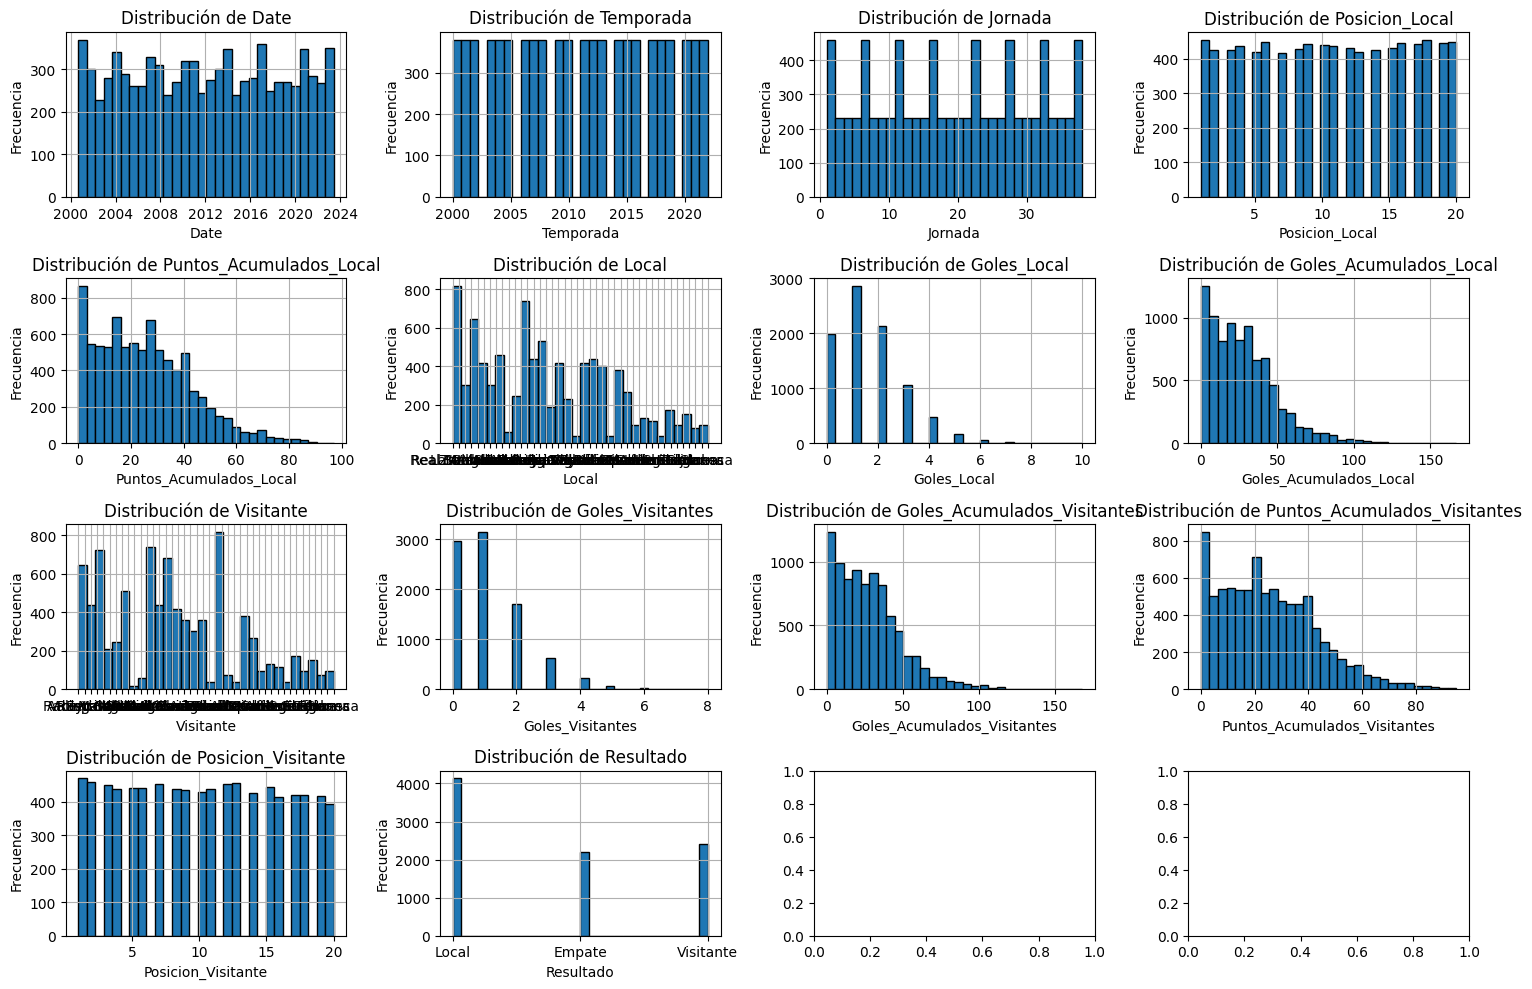

In [174]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))

columns_to_plot = resultados

for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.hist(resultados[column], bins=30, edgecolor='black')
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

plt.tight_layout()
plt.show()


#### Distribución de Resultado

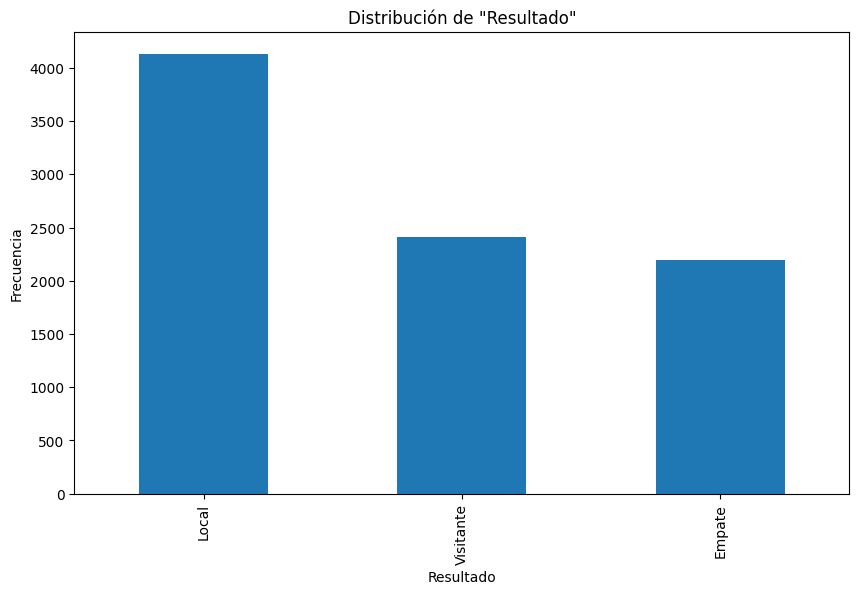

In [175]:
plt.figure(figsize=(10, 6))
resultados['Resultado'].value_counts().plot(kind='bar')
plt.title('Distribución de "Resultado"')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

#### Comparación de Goles

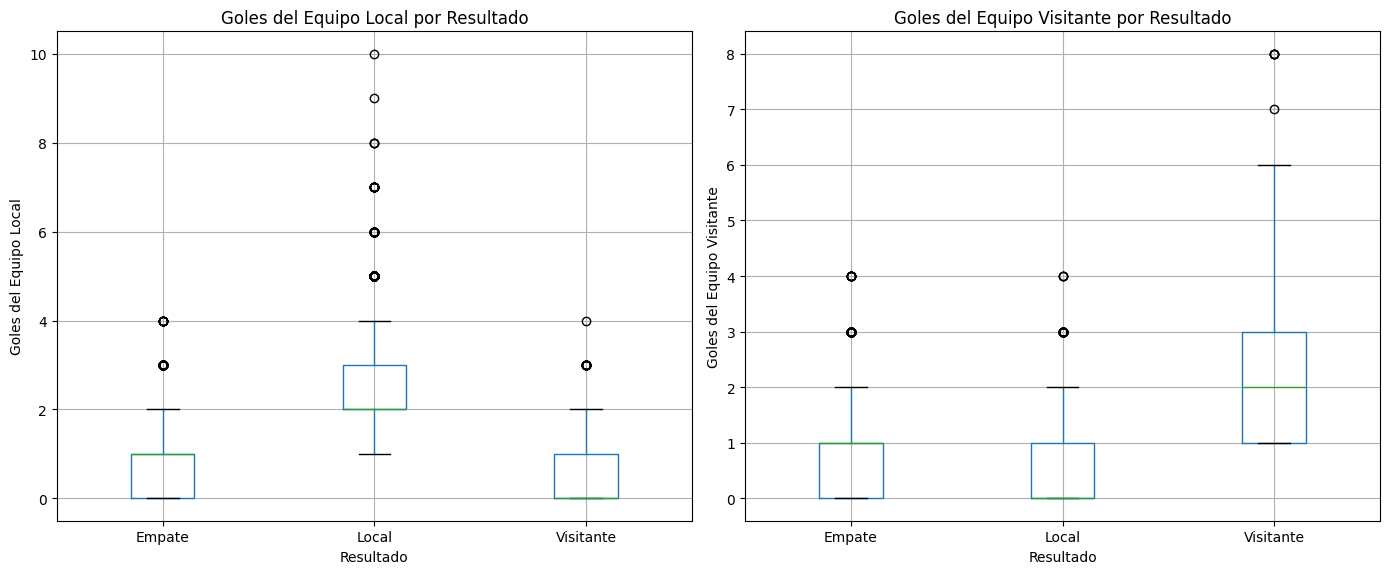

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

resultados.boxplot(column='Goles_Local', by='Resultado', ax=ax[0])
ax[0].set_title('Goles del Equipo Local por Resultado')
ax[0].set_xlabel('Resultado')
ax[0].set_ylabel('Goles del Equipo Local')

resultados.boxplot(column='Goles_Visitantes', by='Resultado', ax=ax[1])
ax[1].set_title('Goles del Equipo Visitante por Resultado')
ax[1].set_xlabel('Resultado')
ax[1].set_ylabel('Goles del Equipo Visitante')

plt.suptitle('') 
plt.tight_layout()
plt.show()

#### Puntos acumulados

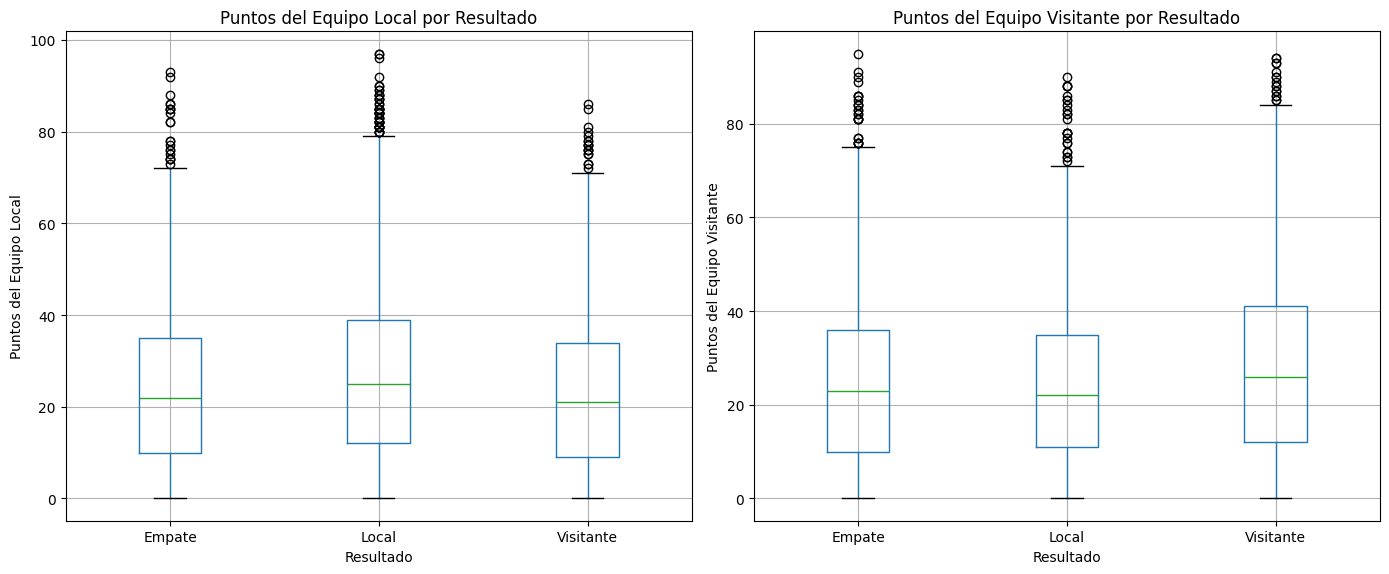

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


resultados.boxplot(column='Puntos_Acumulados_Local', by='Resultado', ax=ax[0])
ax[0].set_title('Puntos del Equipo Local por Resultado')
ax[0].set_xlabel('Resultado')
ax[0].set_ylabel('Puntos del Equipo Local')


resultados.boxplot(column='Puntos_Acumulados_Visitantes', by='Resultado', ax=ax[1])
ax[1].set_title('Puntos del Equipo Visitante por Resultado')
ax[1].set_xlabel('Resultado')
ax[1].set_ylabel('Puntos del Equipo Visitante')


plt.suptitle('')  
plt.tight_layout()
plt.show()

### Resultados por temporada

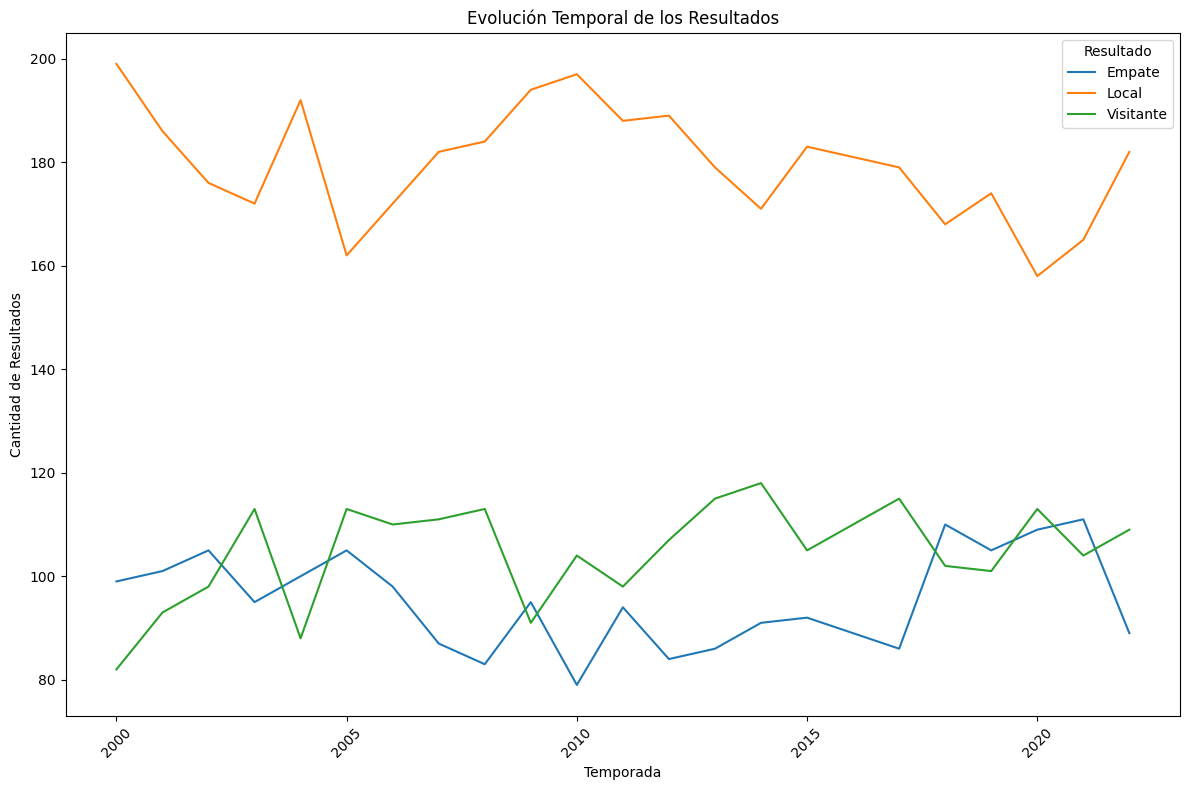

In [ ]:
# Agrupar los datos por temporada y calcular la cantidad de cada resultado por temporada
tempo = resultados.groupby(['Temporada', 'Resultado']).size().unstack(fill_value=0)


fig, ax = plt.subplots(figsize=(12, 8))

tempo.plot(kind='line', ax=ax)
ax.set_title('Evolución Temporal de los Resultados')
ax.set_xlabel('Temporada')
ax.set_ylabel('Cantidad de Resultados')
ax.legend(title='Resultado')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribución de Resultados en Función de la Posición del Equipo Local

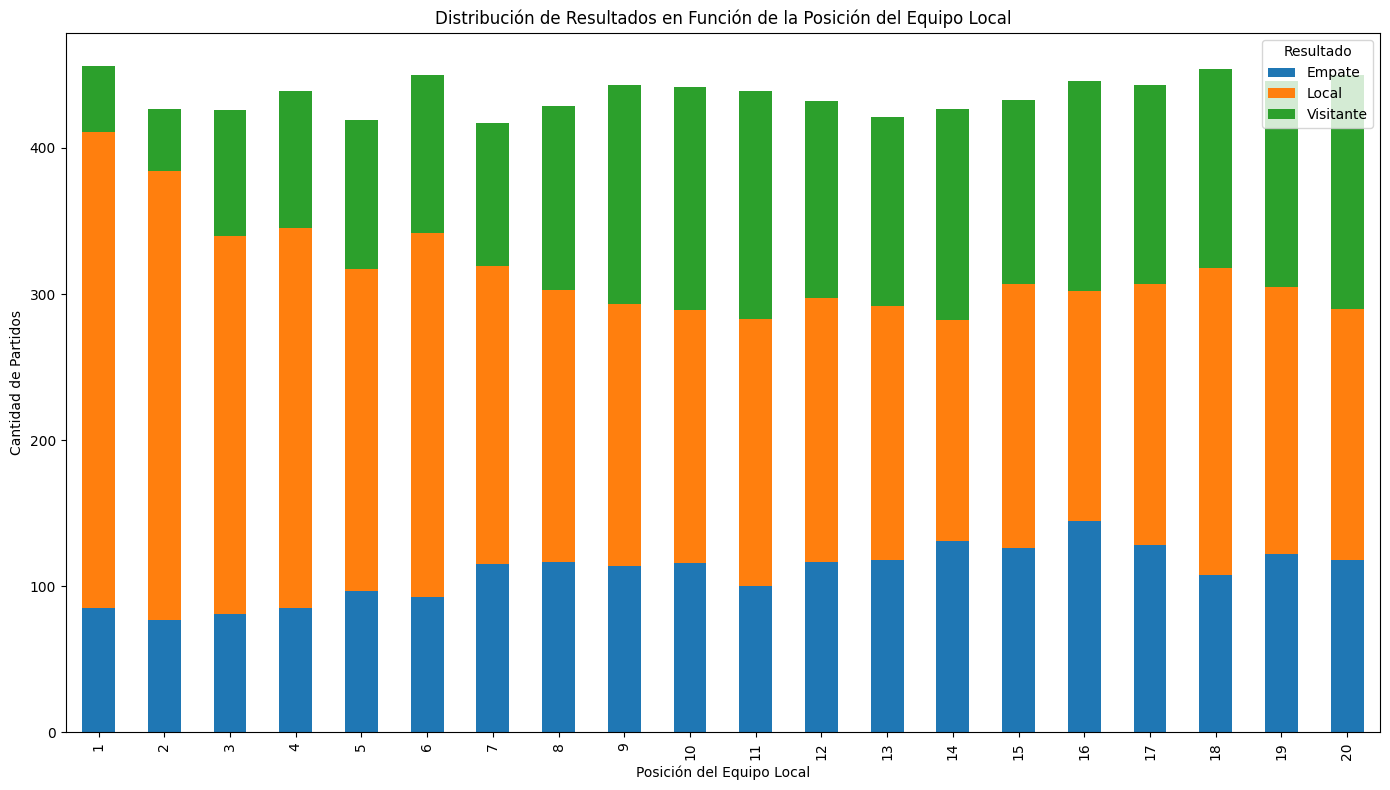

In [ ]:
# Crear una gráfica de barras apiladas para Posicion_Local y Resultado
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar los datos por Posicion_Local y Resultado, y contar las ocurrencias
posicion_local_resultado = resultados.groupby(['Posicion_Local', 'Resultado']).size().unstack(fill_value=0)

# Crear la gráfica de barras apiladas
posicion_local_resultado.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribución de Resultados en Función de la Posición del Equipo Local')
ax.set_xlabel('Posición del Equipo Local')
ax.set_ylabel('Cantidad de Partidos')
ax.legend(title='Resultado')

plt.tight_layout()
plt.show()


### Distribución de Resultados en Función de la Posición del Equipo Visitante

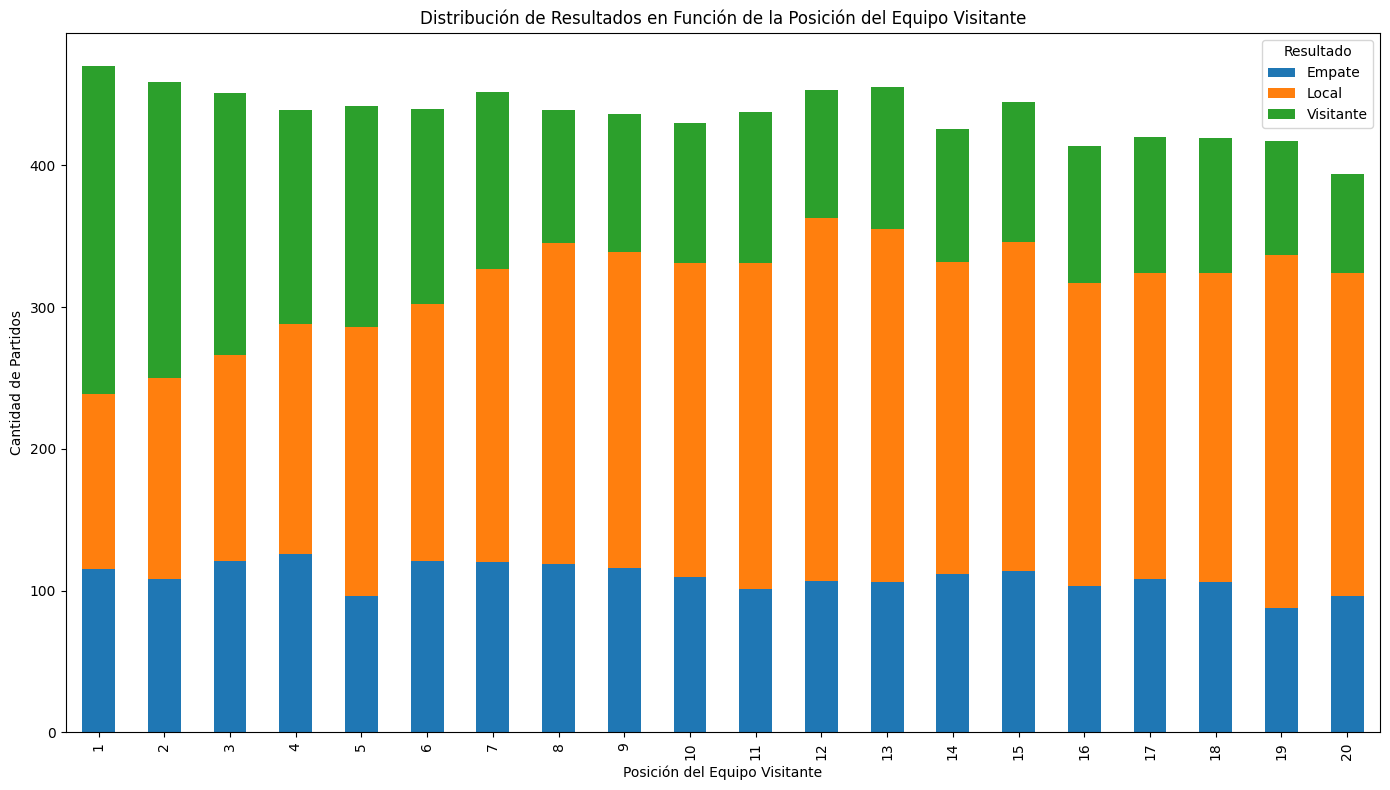

In [ ]:
# Crear una gráfica de barras apiladas para Posicion_Local y Resultado
fig, ax = plt.subplots(figsize=(14, 8))

# Agrupar los datos por Posicion_Local y Resultado, y contar las ocurrencias
posicion_local_resultado = resultados.groupby(['Posicion_Visitante', 'Resultado']).size().unstack(fill_value=0)

# Crear la gráfica de barras apiladas
posicion_local_resultado.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribución de Resultados en Función de la Posición del Equipo Visitante')
ax.set_xlabel('Posición del Equipo Visitante')
ax.set_ylabel('Cantidad de Partidos')
ax.legend(title='Resultado')

plt.tight_layout()
plt.show()


### Distribución de de resultados por todos los equipos

##### He utilizado el local porque igualmente salen todos los nombre de los equipos no variaba nada

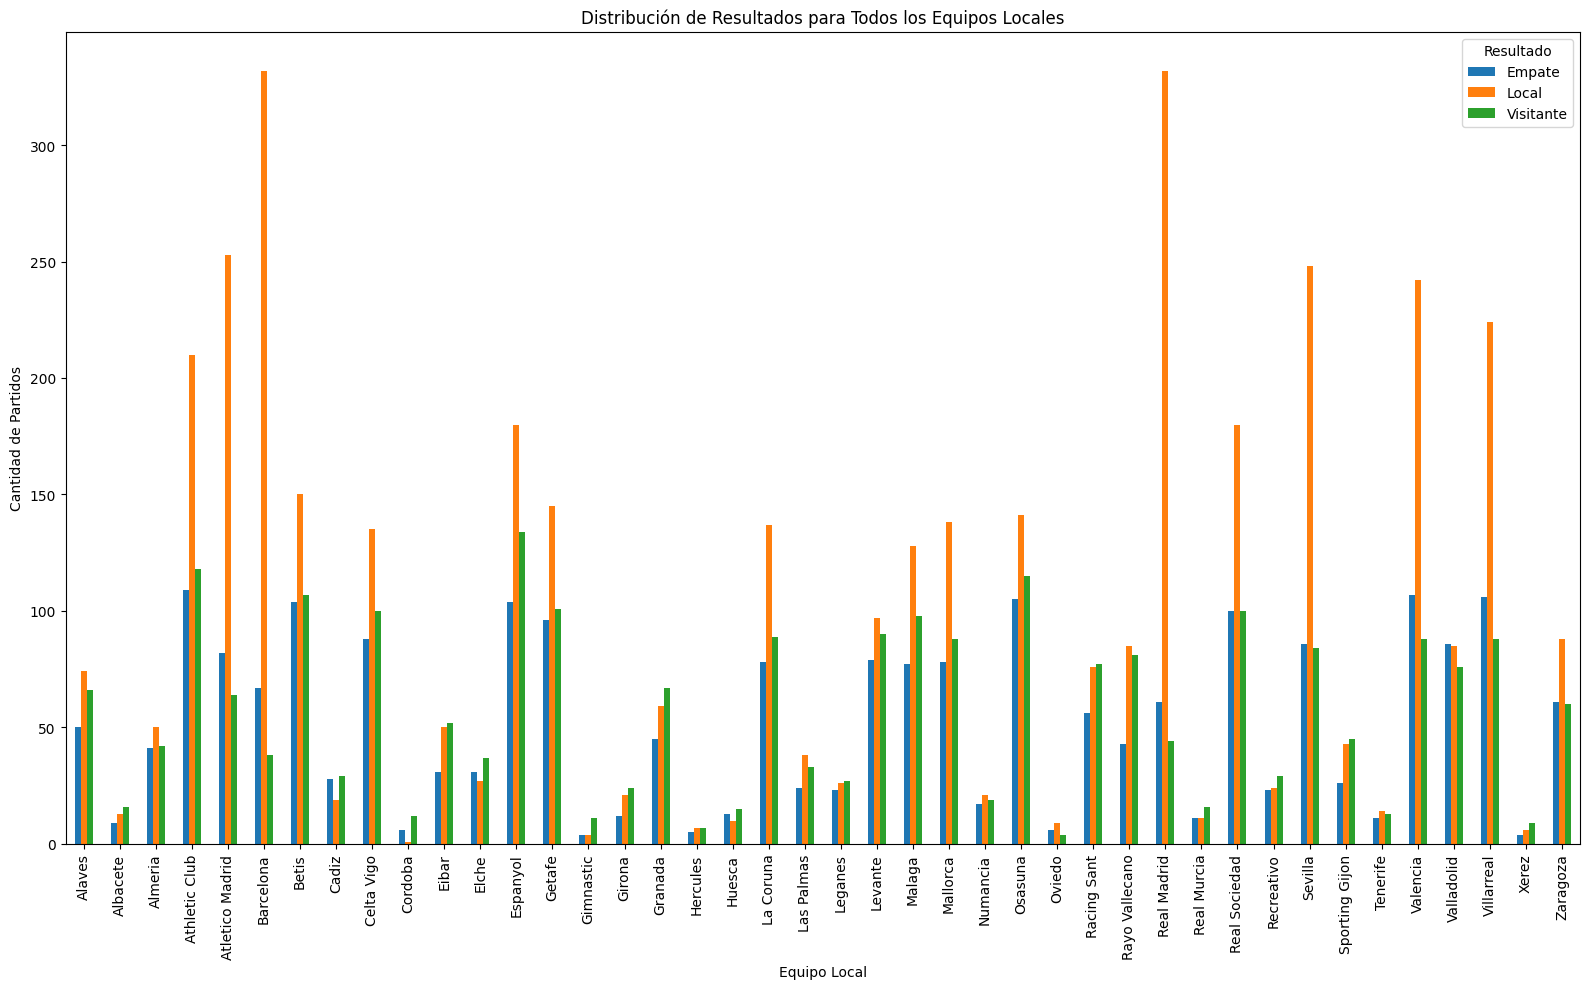

In [ ]:
# Crear una gráfica de barras agrupadas para mostrar los resultados de todos los equipos
fig, ax = plt.subplots(figsize=(16, 10))

# Agrupar los datos por equipo local y resultado, y contar las ocurrencias
equipos_resultado = resultados.groupby(['Local', 'Resultado']).size().unstack(fill_value=0)

# Crear la gráfica de barras agrupadas
equipos_resultado.plot(kind='bar', ax=ax)

ax.set_title('Distribución de Resultados para Todos los Equipos Locales')
ax.set_xlabel('Equipo Local')
ax.set_ylabel('Cantidad de Partidos')
ax.legend(title='Resultado')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Gráfica de dispersión de Goles y Puntos Acumulados con color por Resultado

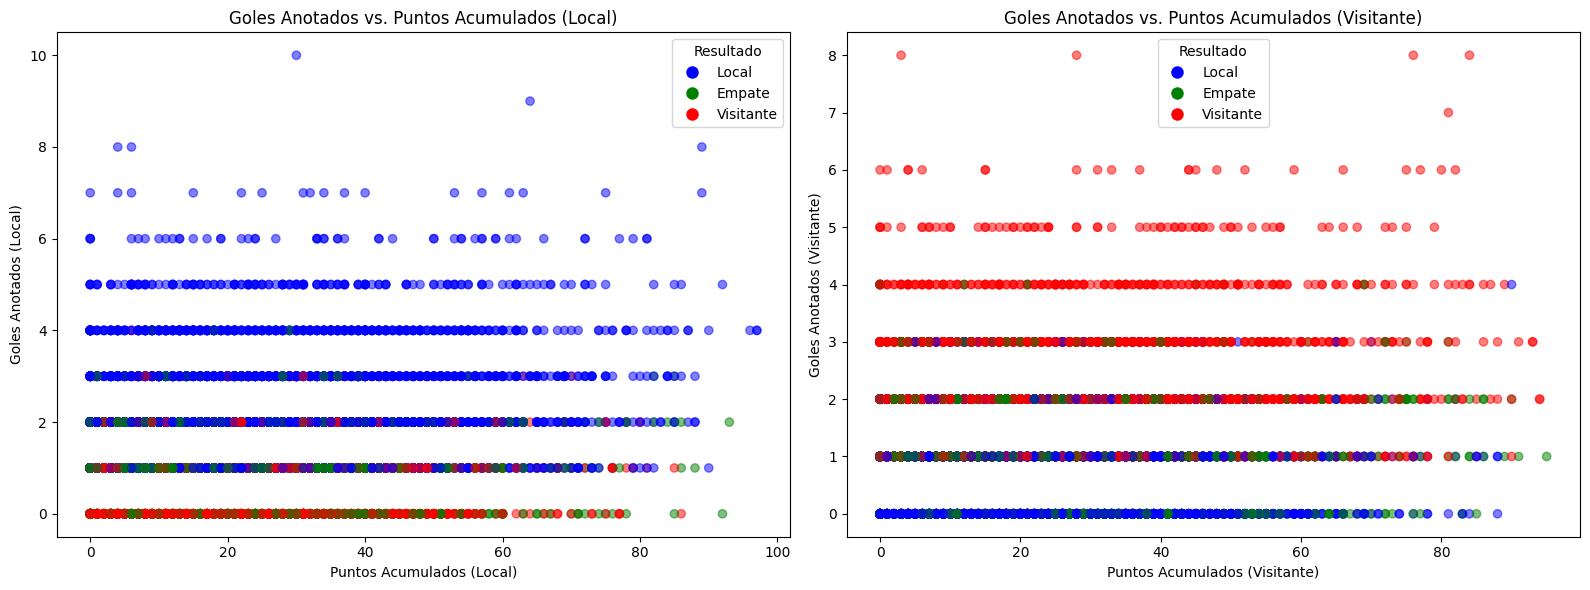

In [ ]:
# Crear una gráfica de dispersión para Goles y Puntos Acumulados con color por Resultado

fig, ax = plt.subplots(1, 2, figsize=(16, 6))


scatter1 = ax[0].scatter(resultados['Puntos_Acumulados_Local'], resultados['Goles_Local'], 
                         c=resultados['Resultado'].apply(lambda x: {'Local': 'blue', 'Empate': 'green', 'Visitante': 'red'}[x]), alpha=0.5)
ax[0].set_title('Goles Anotados vs. Puntos Acumulados (Local)')
ax[0].set_xlabel('Puntos Acumulados (Local)')
ax[0].set_ylabel('Goles Anotados (Local)')

legend1_labels = ['Local', 'Empate', 'Visitante']
legend1_colors = ['blue', 'green', 'red']
handles1 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend1_colors]
ax[0].legend(handles1, legend1_labels, title='Resultado')


scatter2 = ax[1].scatter(resultados['Puntos_Acumulados_Visitantes'], resultados['Goles_Visitantes'], 
                         c=resultados['Resultado'].apply(lambda x: {'Local': 'blue', 'Empate': 'green', 'Visitante': 'red'}[x]), alpha=0.5)
ax[1].set_title('Goles Anotados vs. Puntos Acumulados (Visitante)')
ax[1].set_xlabel('Puntos Acumulados (Visitante)')
ax[1].set_ylabel('Goles Anotados (Visitante)')


legend2_labels = ['Local', 'Empate', 'Visitante']
legend2_colors = ['blue', 'green', 'red']
handles2 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend2_colors]
ax[1].legend(handles2, legend2_labels, title='Resultado')

plt.tight_layout()
plt.show()


#### Vamos hacer un paron rapido para ver la correlacion con nuestra feature "Resultado"
####  Transformamos las categoricas a numericas 

In [ ]:

encoded = resultados.copy()


label_encoder = LabelEncoder()
categorical_columns = ['Date', 'Local', 'Visitante', 'Resultado']

for column in categorical_columns:
   encoded[column] = label_encoder.fit_transform(encoded[column])

In [ ]:
# Calcular la correlación de todas las columnas con 'Resultado'
target_column = 'Resultado'
correlation_with_target = abs(encoded.corr()[target_column])


correlation_with_target = correlation_with_target.sort_values(ascending=False)

correlation_with_target

Resultado                       1.000000
Goles_Visitantes                0.431976
Numero_Goles_Total              0.186806
Goles_Local                     0.129826
Posicion_Visitante              0.097892
Goles_Acumulados_Visitantes     0.071794
Puntos_Acumulados_Visitantes    0.070571
Posicion_Local                  0.037576
Puntos_Acumulados_Local         0.014669
Temporada                       0.013072
Goles_Acumulados_Local          0.011309
Local                           0.010747
Date                            0.009801
Jornada                         0.009255
Visitante                       0.009103
Name: Resultado, dtype: float64

#### Al analizar los campos con mayor correlación, observamos que están directamente relacionados con el resultado final. Estos campos reflejan directamente el resultado, por lo que no son útiles para nuestro modelo.

### Vamos a seguir picando y generando nuevos datos 

<img src="../../../Imagenes/Mineria.jpg" alt="Texto Datos" width="1800" height="500"/>

### Generacion de RatioXJornada = Puntos acumulado / Jornada

In [ ]:
resultados["Ratio_Jornada_Local"] = resultados.Puntos_Acumulados_Local / resultados.Jornada
resultados["Ratio_Jornada_Visitante"] = resultados.Puntos_Acumulados_Visitantes / resultados.Jornada

### Generacion de Categorica para saber en que situacion de la tabla se encuentra

In [ ]:
resultados = clasificacion(resultados)

In [ ]:
resultados.drop_duplicates(subset=resultados.columns, inplace=True)


In [ ]:
resultados.head(10)

,Date,Temporada,Jornada,Posicion_Local,Puntos_Acumulados_Local,Local,Goles_Local,Goles_Acumulados_Local,Visitante,Goles_Visitantes,Goles_Acumulados_Visitantes,Puntos_Acumulados_Visitantes,Posicion_Visitante,Resultado,Numero_Goles_Total,Ratio_Jornada_Local,Ratio_Jornada_Visitante,Estado_Tabla_Local,Estado_Tabla_Visitante
0,2000-09-09,2000,1,7,0.0,Real Madrid,2,0.0,Valencia,1,0.0,0.0,5,Local,3,0.0,0.0,Parte Alta,Parte Alta
1,2000-09-09,2000,1,6,0.0,Real Sociedad,2,0.0,Racing Sant,2,0.0,0.0,9,Empate,4,0.0,0.0,Parte Alta,Mitad de Tabla
2,2000-09-09,2000,1,16,0.0,La Coruna,2,0.0,Athletic Club,0,0.0,0.0,2,Local,2,0.0,0.0,Parte Baja,Champions
3,2000-09-09,2000,1,20,0.0,Zaragoza,1,0.0,Espanyol,2,0.0,0.0,17,Visitante,3,0.0,0.0,Zona Descenso,Parte Baja
4,2000-09-09,2000,1,19,0.0,Barcelona,2,0.0,Malaga,1,0.0,0.0,14,Local,3,0.0,0.0,Zona Descenso,Parte Baja
5,2000-09-10,2000,1,3,0.0,Villarreal,1,0.0,Rayo Vallecano,5,0.0,0.0,8,Visitante,6,0.0,0.0,Champions,Parte Alta
6,2000-09-10,2000,1,13,0.0,Mallorca,1,0.0,Valladolid,1,0.0,0.0,4,Empate,2,0.0,0.0,Mitad de Tabla,Champions
7,2000-09-10,2000,1,15,0.0,Las Palmas,0,0.0,Alaves,3,0.0,0.0,1,Visitante,3,0.0,0.0,Parte Baja,Champions
8,2000-09-10,2000,1,11,0.0,Osasuna,0,0.0,Celta Vigo,2,0.0,0.0,18,Visitante,2,0.0,0.0,Mitad de Tabla,Zona Descenso
9,2000-09-10,2000,1,12,0.0,Numancia,1,0.0,Oviedo,0,0.0,0.0,10,Local,1,0.0,0.0,Mitad de Tabla,Mitad de Tabla


In [ ]:
resultados.drop_duplicates(subset=resultados.columns, inplace=True)

### Extraer el resultado del partido para saber quien ha ganado o perdido, y luego acumarlo en una racha de 3 partidos para saber la forma

In [ ]:
# Crear columnas para el cálculo de forma
resultados['Resultado_Local'] = resultados.apply(lambda x: calcular_resultado(x, x['Local']), axis=1)  #Generamos dos columnas nuevas para almacenar el resultado local y el visitante.
resultados['Resultado_Visitante'] = resultados.apply(lambda x: calcular_resultado(x, x['Visitante']), axis=1)

resultados['Racha_Local'] = resultados.apply(lambda x: actualizar_forma(forma_local, x['Local'], x['Resultado_Local']), axis=1)
resultados['Racha_Visitante'] = resultados.apply(lambda x: actualizar_forma(forma_visitante, x['Visitante'], x['Resultado_Visitante']), axis=1)

### Para calcular el rendimiento nos basamos en 3 partidos: 9 Puntos EXCELENTE, 7 MUY BUENA, 6 BUENA, 5 Y 4 REGULAR Y EL RESTO IRREGULAR

In [ ]:

resultados['Racha_Puntos_Local'] = resultados['Racha_Local'].apply(clasificador_rendimiento_forma)
resultados['Racha_Puntos_Visitante'] = resultados['Racha_Visitante'].apply(clasificador_rendimiento_forma)

In [ ]:
# Eliminar duplicados en todo el conjunto de datos manteniendo una sola entrada por partido
resultados = resultados.drop_duplicates(subset=['Date', 'Local', 'Visitante'])

In [ ]:
resultados.reset_index(drop=True, inplace=True)


In [ ]:
resultados.tail(10)

,Date,Temporada,Jornada,Posicion_Local,Puntos_Acumulados_Local,Local,Goles_Local,Goles_Acumulados_Local,Visitante,Goles_Visitantes,Goles_Acumulados_Visitantes,Puntos_Acumulados_Visitantes,Posicion_Visitante,Resultado,Numero_Goles_Total,Ratio_Jornada_Local,Ratio_Jornada_Visitante,Estado_Tabla_Local,Estado_Tabla_Visitante,Resultado_Local,Resultado_Visitante,Racha_Local,Racha_Visitante,Racha_Puntos_Local,Racha_Puntos_Visitante
8729,2023-06-04,2022,38,5,63.0,Villarreal,2,58.0,Atletico Madrid,2,78.0,76.0,3,Empate,4,1.657895,2.000000,Parte Alta,Champions,E,E,GGG,GPE,Excelente,Regular
8730,2023-06-04,2022,38,4,68.0,Real Sociedad,2,49.0,Sevilla,1,47.0,49.0,9,Local,3,1.789474,1.289474,Champions,Mitad de Tabla,G,P,GEG,GGE,Muy Buena,Muy Buena
8731,2023-06-04,2022,38,6,59.0,Betis,1,49.0,Valencia,1,43.0,41.0,15,Empate,2,1.552632,1.078947,Parte Alta,Parte Baja,E,E,EGP,PGP,Regular,Irregular
8732,2023-06-04,2022,38,12,47.0,Mallorca,3,37.0,Rayo Vallecano,0,46.0,49.0,10,Local,3,1.236842,1.289474,Mitad de Tabla,Mitad de Tabla,G,P,EGG,PPP,Muy Buena,Mala
8733,2023-06-04,2022,38,20,24.0,Elche,1,29.0,Cadiz,1,31.0,41.0,14,Empate,2,0.631579,1.078947,Zona Descenso,Parte Baja,E,E,GGE,PPP,Muy Buena,Mala
8734,2023-06-04,2022,38,19,36.0,Espanyol,3,53.0,Almeria,3,58.0,40.0,17,Empate,6,0.947368,1.052632,Zona Descenso,Parte Baja,E,E,GPE,PPP,Regular,Mala
8735,2023-06-04,2022,38,18,39.0,Valladolid,0,34.0,Getafe,0,34.0,41.0,13,Empate,0,1.026316,1.078947,Zona Descenso,Mitad de Tabla,E,E,PPG,PPG,Irregular,Irregular
8736,2023-06-04,2022,38,2,77.0,Real Madrid,1,80.0,Athletic Club,1,46.0,50.0,7,Empate,2,2.026316,1.315789,Champions,Parte Alta,E,E,GGG,EPP,Excelente,Mala
8737,2023-06-04,2022,38,8,50.0,Osasuna,2,36.0,Girona,1,57.0,49.0,11,Local,3,1.315789,1.289474,Parte Alta,Mitad de Tabla,G,P,PGG,GEE,Buena,Regular
8738,2023-06-04,2022,38,16,40.0,Celta Vigo,2,42.0,Barcelona,1,76.0,88.0,1,Local,3,1.052632,2.315789,Parte Baja,Champions,G,P,GPE,PGP,Regular,Irregular


#### Media de goles en esos encuentros

In [ ]:

# Crear un identificador único para cada enfrentamiento
resultados['Match_ID'] = resultados.apply(lambda x: '_'.join(sorted([x['Local'], x['Visitante']])), axis=1)

# Ordenar el dataframe por fecha para mantener el orden cronológico
df = resultados.sort_values(by='Date')

# Crear un dataframe para almacenar los resultados
result_df = pd.DataFrame()

# Usar groupby para agrupar por el identificador de enfrentamiento
grouped = df.groupby('Match_ID')

# Procesar cada grupo
for match_id, group in grouped:
    group = group.sort_values(by='Date')
    group['Cumulative_Goles_Local'] = group['Goles_Local'].cumsum().shift(1)
    group['Cumulative_Goles_Visitante'] = group['Goles_Visitantes'].cumsum().shift(1)
    group['Partidos_Jugados'] = range(1, len(group) + 1)
    group['Cumulative_Goles_Total'] = group['Cumulative_Goles_Local'] + group['Cumulative_Goles_Visitante']
    group['Media_Goles'] = group['Cumulative_Goles_Total'] / (group['Partidos_Jugados'] - 1)
    result_df = pd.concat([result_df, group])

# Limpiar las columnas temporales
result_df = result_df[['Date', 'Temporada', 'Local', 'Visitante', 'Media_Goles']]





In [ ]:
# Sustituir NaN por 0 en la columna 'Media_Goles'
result_df['Media_Goles'] = result_df['Media_Goles'].fillna(0)

In [ ]:
# Unir la columna 'Media_Goles' con el dataframe original 'df' basado en las columnas 'Date', 'Temporada', 'Local' y 'Visitante'
resultados = resultados.merge(result_df[['Date', 'Temporada', 'Local', 'Visitante', 'Media_Goles']],
                     on=['Date', 'Temporada', 'Local', 'Visitante'], 
                     how='left')


In [ ]:
resultados.tail(3)

,Date,Temporada,Jornada,Posicion_Local,Puntos_Acumulados_Local,Local,Goles_Local,Goles_Acumulados_Local,Visitante,Goles_Visitantes,Goles_Acumulados_Visitantes,Puntos_Acumulados_Visitantes,Posicion_Visitante,Resultado,Numero_Goles_Total,Ratio_Jornada_Local,Ratio_Jornada_Visitante,Estado_Tabla_Local,Estado_Tabla_Visitante,Resultado_Local,Resultado_Visitante,Racha_Local,Racha_Visitante,Racha_Puntos_Local,Racha_Puntos_Visitante,Match_ID,Media_Goles
8736,2023-06-04,2022,38,2,77.0,Real Madrid,1,80.0,Athletic Club,1,46.0,50.0,7,Empate,2,2.026316,1.315789,Champions,Parte Alta,E,E,GGG,EPP,Excelente,Mala,Athletic Club_Real Madrid,3.111111
8737,2023-06-04,2022,38,8,50.0,Osasuna,2,36.0,Girona,1,57.0,49.0,11,Local,3,1.315789,1.289474,Parte Alta,Mitad de Tabla,G,P,PGG,GEE,Buena,Regular,Girona_Osasuna,2.000000
8738,2023-06-04,2022,38,16,40.0,Celta Vigo,2,42.0,Barcelona,1,76.0,88.0,1,Local,3,1.052632,2.315789,Parte Baja,Champions,G,P,GPE,PGP,Regular,Irregular,Barcelona_Celta Vigo,3.393939


### Media de goles de esos equipos en esos partidos.

In [ ]:
# Crear un identificador único para cada enfrentamiento
resultados['Match_ID'] = resultados.apply(lambda x: '_'.join(sorted([x['Local'], x['Visitante']])), axis=1)

# Ordenar el dataframe por fecha para mantener el orden cronológico
df = df.sort_values(by='Date')

# Crear un dataframe para almacenar los resultados
result_df_individual = pd.DataFrame()

# Usar groupby para agrupar por el identificador de enfrentamiento
grouped = df.groupby('Match_ID')

# Procesar cada grupo
for match_id, group in grouped:
    group = group.sort_values(by='Date')
    group['Cumulative_Goles_Local'] = group.apply(lambda x: group[(group['Local'] == x['Local']) & (group['Date'] < x['Date'])]['Goles_Local'].sum(), axis=1)
    group['Cumulative_Goles_Visitante'] = group.apply(lambda x: group[(group['Visitante'] == x['Visitante']) & (group['Date'] < x['Date'])]['Goles_Visitantes'].sum(), axis=1)
    group['Partidos_Jugados_Local'] = group.apply(lambda x: len(group[(group['Local'] == x['Local']) & (group['Date'] < x['Date'])]), axis=1)
    group['Partidos_Jugados_Visitante'] = group.apply(lambda x: len(group[(group['Visitante'] == x['Visitante']) & (group['Date'] < x['Date'])]), axis=1)
    group['Media_Goles_Local'] = group['Cumulative_Goles_Local'] / group['Partidos_Jugados_Local'].replace(0, 1)
    group['Media_Goles_Visitante'] = group['Cumulative_Goles_Visitante'] / group['Partidos_Jugados_Visitante'].replace(0, 1)
    result_df_individual = pd.concat([result_df_individual, group])

# Limpiar las columnas temporales
result_df_individual = result_df_individual[['Date', 'Temporada', 'Local', 'Visitante', 'Media_Goles_Local', 'Media_Goles_Visitante']]

# Unir los resultados individuales con el dataframe original
resultados = resultados.merge(result_df_individual[['Date', 'Temporada', 'Local', 'Visitante', 'Media_Goles_Local', 'Media_Goles_Visitante']],
                                on=['Date', 'Temporada', 'Local', 'Visitante'], 
                                how='left')


In [ ]:


# Crear un diccionario para asignar puntos según la posición (20 puntos para el 1ro, 1 punto para el 20mo)
points_dict = {i: 21-i for i in range(1, 21)}

# Filtrar las posiciones finales de la jornada 38 para equipos locales
df_positions_local = resultados[resultados['Jornada'] == 38][['Temporada', 'Local', 'Posicion_Local']].drop_duplicates()
df_positions_local['Puntos'] = df_positions_local['Posicion_Local'].map(points_dict)
df_positions_local.columns = ['Temporada', 'Equipo', 'Posicion', 'Puntos']

# Filtrar las posiciones finales de la jornada 38 para equipos visitantes
df_positions_visitante = resultados[resultados['Jornada'] == 38][['Temporada', 'Visitante', 'Posicion_Local']].drop_duplicates()
df_positions_visitante.columns = ['Temporada', 'Equipo', 'Posicion']
df_positions_visitante['Puntos'] = df_positions_visitante['Posicion'].map(points_dict)

# Concatenar ambos dataframes
df_positions = pd.concat([df_positions_local, df_positions_visitante])

# Sumar los puntos por cada equipo a lo largo de todas las temporadas
ranking_df = df_positions.groupby('Equipo')['Puntos'].sum().reset_index()
ranking_df.columns = ['Equipo', 'Puntos_Totales']

# Unir los resultados del ranking con el dataframe original basado en el equipo local
resultados = resultados.merge(ranking_df, left_on='Local', right_on='Equipo', how='left')
resultados.rename(columns={'Puntos_Totales': 'Ranking_Local'}, inplace=True)
resultados.drop(columns=['Equipo'], inplace=True)

# Unir los resultados del ranking con el dataframe original basado en el equipo visitante
resultados = resultados.merge(ranking_df, left_on='Visitante', right_on='Equipo', how='left')
resultados.rename(columns={'Puntos_Totales': 'Ranking_Visitante'}, inplace=True)
resultados.drop(columns=['Equipo'], inplace=True)


In [ ]:

# Ordenar el DataFrame por temporada, jornada y fecha para asegurarnos de que los cálculos son correctos
resultados = resultados.sort_values(by=['Temporada', 'Jornada', 'Date']).reset_index(drop=True)

# Inicializar las columnas de goles encajados y goles marcados
resultados['Goles_Encajados_Local_Acumulados'] = 0
resultados['Goles_Encajados_Visitante_Acumulados'] = 0
resultados['Goles_Marcados_Local_Acumulados'] = 0
resultados['Goles_Marcados_Visitante_Acumulados'] = 0

# Calcular los goles encajados y marcados por el equipo local hasta la jornada actual (sin incluir la jornada actual)
for temporada in resultados['Temporada'].unique():
    for equipo in resultados['Local'].unique():
        mask_local = (resultados['Temporada'] == temporada) & (resultados['Local'] == equipo)
        resultados.loc[mask_local, 'Goles_Encajados_Local_Acumulados'] = resultados.loc[mask_local, 'Goles_Visitantes'].shift().cumsum().fillna(0)
        resultados.loc[mask_local, 'Goles_Marcados_Local_Acumulados'] = resultados.loc[mask_local, 'Goles_Local'].shift().cumsum().fillna(0)

# Calcular los goles encajados y marcados por el equipo visitante hasta la jornada actual (sin incluir la jornada actual)
for temporada in resultados['Temporada'].unique():
    for equipo in resultados['Visitante'].unique():
        mask_visitante = (resultados['Temporada'] == temporada) & (resultados['Visitante'] == equipo)
        resultados.loc[mask_visitante, 'Goles_Encajados_Visitante_Acumulados'] = resultados.loc[mask_visitante, 'Goles_Local'].shift().cumsum().fillna(0)
        resultados.loc[mask_visitante, 'Goles_Marcados_Visitante_Acumulados'] = resultados.loc[mask_visitante, 'Goles_Visitantes'].shift().cumsum().fillna(0)



In [ ]:
resultados['Diferencia_Posicion'] = resultados['Posicion_Local'] - resultados['Posicion_Visitante']

In [ ]:

# Inicializar columnas de rendimiento y forma reciente
resultados['Rendimiento_Casa_Local'] = 0
resultados['Rendimiento_Fuera_Visitante'] = 0
resultados['Forma_Reciente_Local'] = 0
resultados['Forma_Reciente_Visitante'] = 0

# Calcular rendimiento y forma reciente para cada equipo
teams = resultados['Local'].unique()

# Promedios acumulados y formas recientes
for team in teams:
    # Datos del equipo local y visitante
    local_games = resultados[resultados['Local'] == team]
    visitante_games = resultados[resultados['Visitante'] == team]
    
    # Rendimiento en casa
    local_points = local_games['Puntos_Acumulados_Local'].diff().fillna(local_games['Puntos_Acumulados_Local'])
    resultados.loc[resultados['Local'] == team, 'Rendimiento_Casa_Local'] = local_points.expanding().mean()
    
    # Rendimiento fuera
    visitante_points = visitante_games['Puntos_Acumulados_Visitantes'].diff().fillna(visitante_games['Puntos_Acumulados_Visitantes'])
    resultados.loc[resultados['Visitante'] == team, 'Rendimiento_Fuera_Visitante'] = visitante_points.expanding().mean()
    
    # Forma reciente en casa
    resultados.loc[resultados['Local'] == team, 'Forma_Reciente_Local'] = local_points.rolling(window=3).mean().fillna(local_points.expanding().mean())
    
    # Forma reciente fuera
    resultados.loc[resultados['Visitante'] == team, 'Forma_Reciente_Visitante'] = visitante_points.rolling(window=3).mean().fillna(visitante_points.expanding().mean())



C:\Users\raul_\AppData\Local\Temp\ipykernel_10116\1116965769.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00000000e+00 2.00000000e+00 2.66666667e+00 3.50000000e+00
 2.80000000e+00 3.83333333e+00 3.71428571e+00 4.37500000e+00
 4.22222222e+00 4.50000000e+00 4.36363636e+00 4.33333333e+00
 4.07692308e+00 4.00000000e+00 4.13333333e+00 4.25000000e+00
 4.05882353e+00 4.05555556e+00 4.05263158e+00 0.00000000e+00
 4.76190476e-02 1.81818182e-01 2.17391304e-01 3.75000000e-01
 5.20000000e-01 6.15384615e-01 8.14814815e-01 1.00000000e+00
 1.10344828e+00 1.16666667e+00 1.25806452e+00 1.25000000e+00
 1.30303030e+00 1.44117647e+00 1.51428571e+00 1.63888889e+00
 1.67567568e+00 1.71052632e+00 0.00000000e+00 7.50000000e-02
 1.70731707e-01 2.61904762e-01 3.72093023e-01 4.77272727e-01
 5.33333333e-01 5.86956522e-01 7.02127660e-01 7.50000000e-01
 7.95918367e-01 9.00000000e-01 1.00000000e+00 9.80769231e-01
 1.0754717

In [ ]:

# Revisar los partidos para saber si el equipo local o visitante recibieron goles basándose en las columnas Goles_Local y Goles_Visitante
resultados['Local_Porteria_Cero'] = resultados['Goles_Visitantes'] == 0
resultados['Visitante_Porteria_Cero'] = resultados['Goles_Local'] == 0

# Crear columnas acumulativas para porterías a 0 por temporada
resultados['Porterias_Cero_Local_Acum'] = resultados.groupby('Temporada')['Local_Porteria_Cero'].cumsum()
resultados['Porterias_Cero_Visitante_Acum'] = resultados.groupby('Temporada')['Visitante_Porteria_Cero'].cumsum()


In [ ]:
resultados.head()

,Date,Temporada,Jornada,Posicion_Local,Puntos_Acumulados_Local,Local,Goles_Local,Goles_Acumulados_Local,Visitante,Goles_Visitantes,Goles_Acumulados_Visitantes,Puntos_Acumulados_Visitantes,Posicion_Visitante,Resultado,Numero_Goles_Total,Ratio_Jornada_Local,Ratio_Jornada_Visitante,Estado_Tabla_Local,Estado_Tabla_Visitante,Resultado_Local,Resultado_Visitante,Racha_Local,Racha_Visitante,Racha_Puntos_Local,Racha_Puntos_Visitante,Match_ID,Media_Goles,Media_Goles_Local,Media_Goles_Visitante,Ranking_Local,Ranking_Visitante,Goles_Encajados_Local_Acumulados,Goles_Encajados_Visitante_Acumulados,Goles_Marcados_Local_Acumulados,Goles_Marcados_Visitante_Acumulados,Diferencia_Posicion,Rendimiento_Casa_Local,Rendimiento_Fuera_Visitante,Forma_Reciente_Local,Forma_Reciente_Visitante,Local_Porteria_Cero,Visitante_Porteria_Cero,Porterias_Cero_Local_Acum,Porterias_Cero_Visitante_Acum
0,2000-09-09,2000,1,7,0.0,Real Madrid,2,0.0,Valencia,1,0.0,0.0,5,Local,3,0.0,0.0,Parte Alta,Parte Alta,G,P,---,---,Irregular,Irregular,Real Madrid_Valencia,0.0,0.0,0.0,357,281,0,0,0,0,2,0.0,0.0,0.0,0.0,False,False,0,0
1,2000-09-09,2000,1,6,0.0,Real Sociedad,2,0.0,Racing Sant,2,0.0,0.0,9,Empate,4,0.0,0.0,Parte Alta,Mitad de Tabla,E,E,---,---,Irregular,Irregular,Racing Sant_Real Sociedad,0.0,0.0,0.0,237,80,0,0,0,0,-3,0.0,0.0,0.0,0.0,False,False,0,0
2,2000-09-09,2000,1,16,0.0,La Coruna,2,0.0,Athletic Club,0,0.0,0.0,2,Local,2,0.0,0.0,Parte Baja,Champions,G,P,---,---,Irregular,Irregular,Athletic Club_La Coruna,0.0,0.0,0.0,169,271,0,0,0,0,14,0.0,0.0,0.0,0.0,True,False,1,0
3,2000-09-09,2000,1,20,0.0,Zaragoza,1,0.0,Espanyol,2,0.0,0.0,17,Visitante,3,0.0,0.0,Zona Descenso,Parte Baja,P,G,---,---,Irregular,Irregular,Espanyol_Zaragoza,0.0,0.0,0.0,85,190,0,0,0,0,3,0.0,0.0,0.0,0.0,False,False,1,0
4,2000-09-09,2000,1,19,0.0,Barcelona,2,0.0,Malaga,1,0.0,0.0,14,Local,3,0.0,0.0,Zona Descenso,Parte Baja,G,P,---,---,Irregular,Irregular,Barcelona_Malaga,0.0,0.0,0.0,267,173,0,0,0,0,5,0.0,0.0,0.0,0.0,False,False,1,0


In [ ]:
#Exportamos en CSV
resultados.to_csv("Limpiezacasifinal.csv", index=False)

In [ ]:
resultados.drop(columns=["Resultado_Local","Resultado_Visitante","Goles_Visitantes","Goles_Local","Numero_Goles_Total","Match_ID","Local_Porteria_Cero","Visitante_Porteria_Cero","Date"],inplace=True)

#### TRANSFORMAMOS NUESTRO DATA TODO A NUMERICAS PARA VER NUEVAS COLUMNAS QUE PODEMOS GENERAR YA QUE TENEMOS UNA CORRELACION MUY BAJITA

In [ ]:
categorical_columns = resultados.select_dtypes(include=['object']).columns


encoded = resultados.copy()


label_encoder = LabelEncoder()


for column in categorical_columns:
   encoded[column] = label_encoder.fit_transform(encoded[column])

In [ ]:

encoded["Diferencia_Puntos_Local"]= encoded["Puntos_Acumulados_Local"] - encoded["Puntos_Acumulados_Visitantes"] #Diferencia de puntos Local
encoded["Diferencia_Puntos_Visitante"]= encoded["Puntos_Acumulados_Visitantes"] - encoded["Puntos_Acumulados_Local"] #Diferencia de puntos Visitante

encoded["Ratio_Goles_por_partido_Visitante"]= encoded["Goles_Acumulados_Visitantes"] / encoded["Jornada"] #Media de goles Visitante por partido
encoded["Ratio_Goles_por_partido_Local"]= encoded["Goles_Acumulados_Local"] / encoded["Jornada"] #Media de goles Local por partido

encoded["Rendimiento_Ranking_Visitante"]= (encoded["Ranking_Visitante"] * encoded["Ratio_Jornada_Visitante"]) 
encoded["Rendimiento_Ranking_Local"]= (encoded["Ranking_Local"] * encoded["Ratio_Jornada_Local"]) 


In [ ]:
encoded['Diferencia_Ranking'] = encoded['Ranking_Local'] - encoded['Ranking_Visitante']

# Crear nuevas columnas basadas en indicadores binarios mejorados
encoded['Local_Es_Favorito'] = (encoded['Ranking_Local'] < encoded['Ranking_Visitante']).astype(int)
encoded['Visitante_Es_Favorito'] = (encoded['Ranking_Visitante'] < encoded['Ranking_Local']).astype(int)

In [ ]:

# Crear nuevas columnas basadas en interacciones cuadráticas y no lineales
encoded['Ranking_Local_Cuadrado'] = encoded['Ranking_Local'] ** 2
encoded['Ranking_Visitante_Cuadrado'] = encoded['Ranking_Visitante'] ** 2

encoded['Rendimiento_Vistante'] = encoded['Ratio_Goles_por_partido_Visitante'] / encoded['Posicion_Visitante']
encoded['Rendimiento_Local'] = encoded['Ratio_Goles_por_partido_Local'] / encoded['Posicion_Local']


encoded['Local_Es_Ofensivo'] = (encoded['Media_Goles_Local'] < encoded['Media_Goles_Visitante']).astype(int)
encoded['Visitante_Es_Ofensivo'] = (encoded['Media_Goles_Visitante'] < encoded['Media_Goles_Local']).astype(int)


encoded['Local_Es_Defensivo'] = (encoded['Goles_Encajados_Local_Acumulados'] < encoded['Goles_Encajados_Visitante_Acumulados']).astype(int)
encoded['Visitante_Es_Defensivo'] = (encoded['Goles_Encajados_Visitante_Acumulados'] < encoded['Goles_Encajados_Local_Acumulados']).astype(int)

#### Aqui genereamos un monton de columnas para ver la correlación

In [ ]:
# Calcular la correlación de todas las columnas con 'Resultado'
target_column = 'Resultado'
correlation_with_target = abs(encoded.corr()[target_column])

# Ordenar las correlaciones de mayor a menor
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Mostrar las correlaciones
correlation_with_target

Resultado                               1.000000
Rendimiento_Ranking_Visitante           0.134902
Ranking_Visitante_Cuadrado              0.124404
Diferencia_Ranking                      0.121173
Rendimiento_Vistante                    0.119874
Ranking_Visitante                       0.113164
Diferencia_Puntos_Visitante             0.113122
Diferencia_Puntos_Local                 0.113122
Ratio_Goles_por_partido_Visitante       0.099270
Posicion_Visitante                      0.097892
Ratio_Jornada_Visitante                 0.097236
Local_Es_Favorito                       0.095578
Visitante_Es_Favorito                   0.095578
Diferencia_Posicion                     0.095022
Local_Es_Ofensivo                       0.086566
Goles_Marcados_Visitante_Acumulados     0.078100
Estado_Tabla_Visitante                  0.077862
Goles_Acumulados_Visitantes             0.071794
Puntos_Acumulados_Visitantes            0.070571
Visitante_Es_Ofensivo                   0.070175
Media_Goles_Visitant

### Mostramos unas cuantas graficas

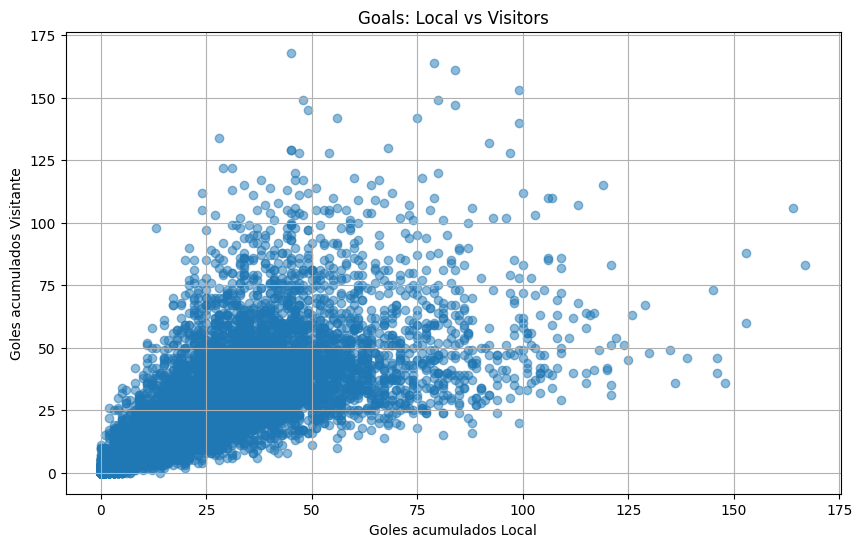

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(encoded['Goles_Acumulados_Local'], encoded['Goles_Acumulados_Visitantes'], alpha=0.5)
plt.title('Goals: Local vs Visitors')
plt.xlabel('Goles acumulados Local')
plt.ylabel('Goles acumulados Visitante')
plt.grid(True)
plt.show()

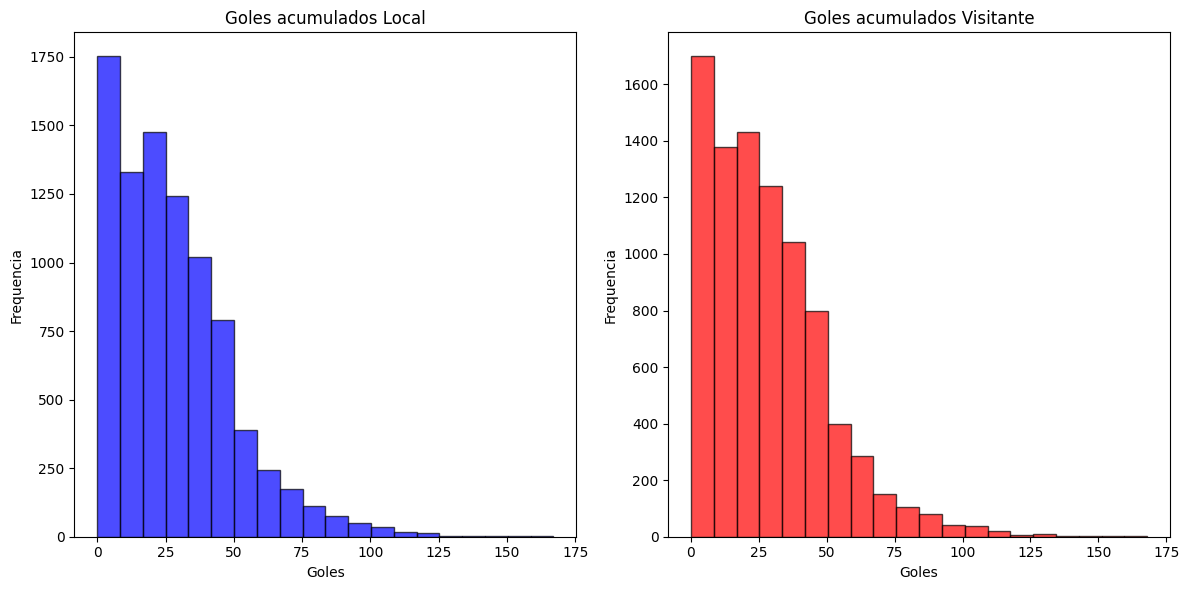

In [ ]:

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.hist(encoded['Goles_Acumulados_Local'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Goles acumulados Local')
plt.xlabel('Goles')
plt.ylabel('Frequencia')

plt.subplot(1, 2, 2)
plt.hist(encoded['Goles_Acumulados_Visitantes'], bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Goles acumulados Visitante')
plt.xlabel('Goles')
plt.ylabel('Frequencia')

plt.tight_layout()
plt.show()


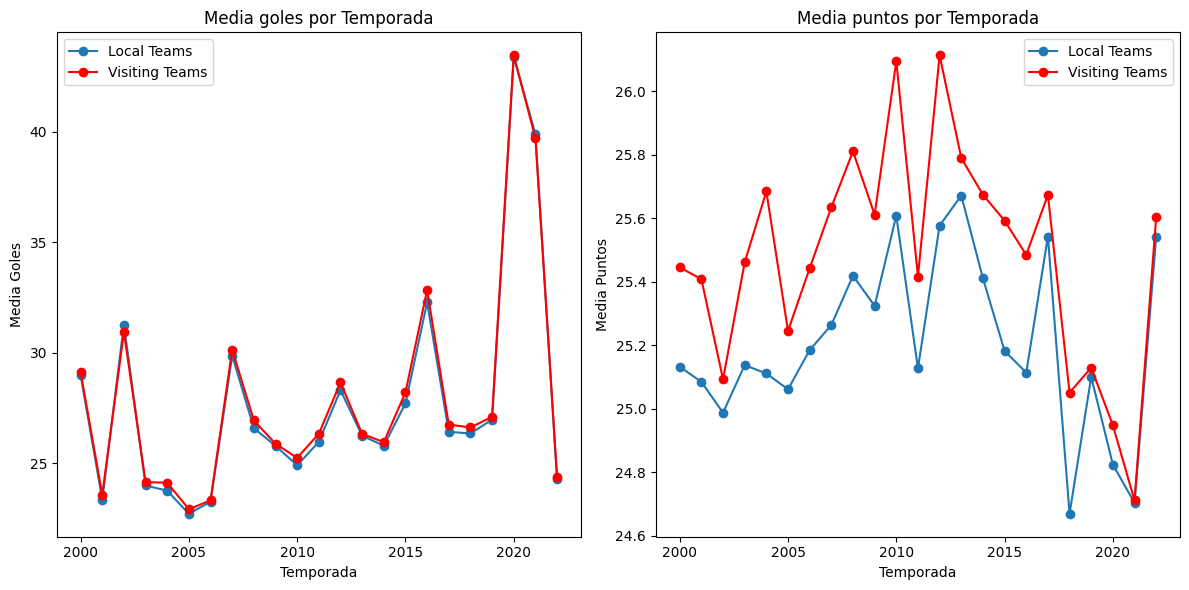

In [ ]:

average_goals_per_season = encoded.groupby('Temporada')[['Goles_Acumulados_Local', 'Goles_Acumulados_Visitantes']].mean().reset_index()


average_points_per_season = encoded.groupby('Temporada')[['Puntos_Acumulados_Local', 'Puntos_Acumulados_Visitantes']].mean().reset_index()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(average_goals_per_season['Temporada'], average_goals_per_season['Goles_Acumulados_Local'], marker='o', label='Local Teams')
plt.plot(average_goals_per_season['Temporada'], average_goals_per_season['Goles_Acumulados_Visitantes'], marker='o', label='Visiting Teams', color='red')
plt.title('Media goles por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Media Goles')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(average_points_per_season['Temporada'], average_points_per_season['Puntos_Acumulados_Local'], marker='o', label='Local Teams')
plt.plot(average_points_per_season['Temporada'], average_points_per_season['Puntos_Acumulados_Visitantes'], marker='o', label='Visiting Teams', color='red')
plt.title('Media puntos por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Media Puntos')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
encoded.tail(3)

,Temporada,Jornada,Posicion_Local,Puntos_Acumulados_Local,Local,Goles_Acumulados_Local,Visitante,Goles_Acumulados_Visitantes,Puntos_Acumulados_Visitantes,Posicion_Visitante,Resultado,Ratio_Jornada_Local,Ratio_Jornada_Visitante,Estado_Tabla_Local,Estado_Tabla_Visitante,Racha_Local,Racha_Visitante,Racha_Puntos_Local,Racha_Puntos_Visitante,Media_Goles,Media_Goles_Local,Media_Goles_Visitante,Ranking_Local,Ranking_Visitante,Goles_Encajados_Local_Acumulados,Goles_Encajados_Visitante_Acumulados,Goles_Marcados_Local_Acumulados,Goles_Marcados_Visitante_Acumulados,Diferencia_Posicion,Rendimiento_Casa_Local,Rendimiento_Fuera_Visitante,Forma_Reciente_Local,Forma_Reciente_Visitante,Porterias_Cero_Local_Acum,Porterias_Cero_Visitante_Acum,Diferencia_Puntos_Local,Diferencia_Puntos_Visitante,Ratio_Goles_por_partido_Visitante,Ratio_Goles_por_partido_Local,Rendimiento_Ranking_Visitante,Rendimiento_Ranking_Local,Diferencia_Ranking,Local_Es_Favorito,Visitante_Es_Favorito,Ranking_Local_Cuadrado,Ranking_Visitante_Cuadrado,Rendimiento_Vistante,Rendimiento_Local,Local_Es_Ofensivo,Visitante_Es_Ofensivo,Local_Es_Defensivo,Visitante_Es_Defensivo
8736,2022,38,2,77.0,30,80.0,3,46.0,50.0,7,0,2.026316,1.315789,0,2,26,20,1,3,3.111111,2.909091,0.818182,357,271,15,27,43,24,-5,0.176201,0.114416,4.000000,1.333333,124,91,27.0,-27.0,1.210526,2.105263,356.578947,723.394737,86,0,1,127449,73441,0.172932,1.052632,0,1,1,0
8737,2022,38,8,50.0,26,36.0,15,57.0,49.0,11,1,1.315789,1.289474,2,1,35,21,0,5,2.000000,0.000000,0.000000,191,26,20,27,22,22,-3,0.138504,0.859649,2.000000,2.666667,124,91,1.0,-1.0,1.500000,0.947368,33.526316,251.315789,165,0,1,36481,676,0.136364,0.118421,0,0,1,0
8738,2022,38,16,40.0,8,42.0,5,76.0,88.0,1,1,1.052632,2.315789,3,0,28,35,5,2,3.393939,1.812500,1.750000,135,267,20,14,24,32,15,0.123839,0.201373,1.333333,4.000000,124,91,-48.0,48.0,2.000000,1.105263,618.315789,142.105263,-132,1,0,18225,71289,2.000000,0.069079,0,1,0,1


### GUARDAMOS

<img src="../../../Imagenes/checkpoing.jpg" alt="Texto alternativo" width="1200" height="400"/>

In [ ]:
#Exportamos en CSV
encoded.to_csv("LimpiezaEncoded.csv", index=False)

### Con el data ya transformado vamos a ver las features mas importantes por el target

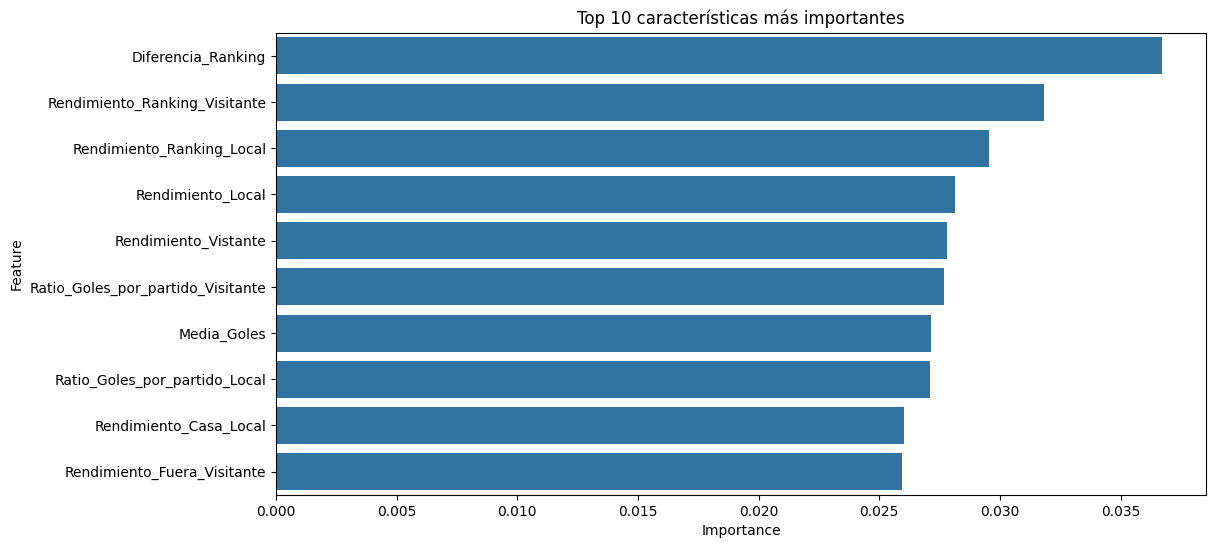

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Calcular la correlación de las variables con el target
correlation = encoded.corr()['Resultado'].abs().sort_values(ascending=False)

# Mostrar las variables más correlacionadas con el target
top_correlation = correlation.head(10)
top_correlation

# Separar características (X) y target (y)
X = encoded.drop(columns=['Resultado'])
y = encoded['Resultado']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de RandomForest para obtener la importancia de las características
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_
features = X.columns

# Crear un DataFrame con las características y sus importancias
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Graficar las características más importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 10 características más importantes')
plt.show()


important_features = importance_df['Feature'].values

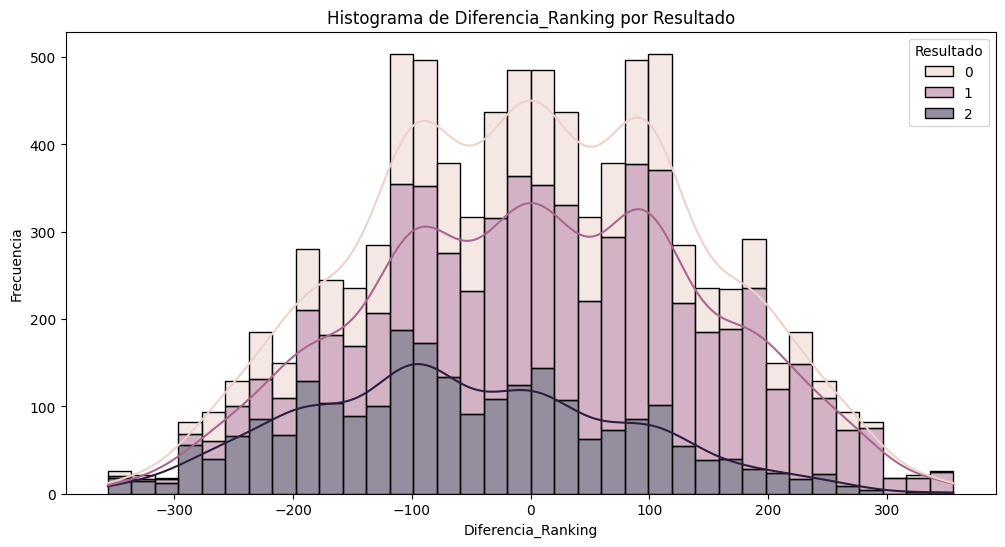

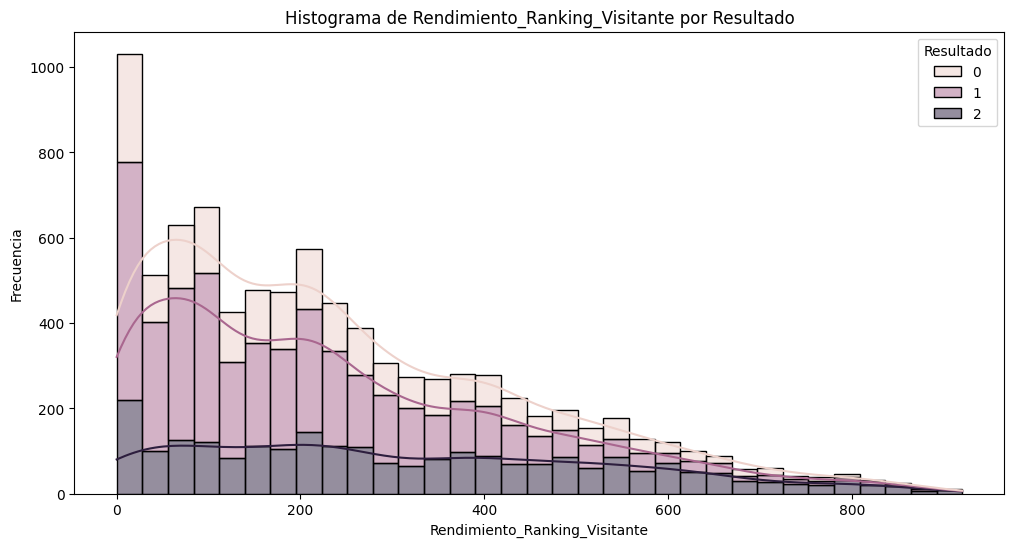

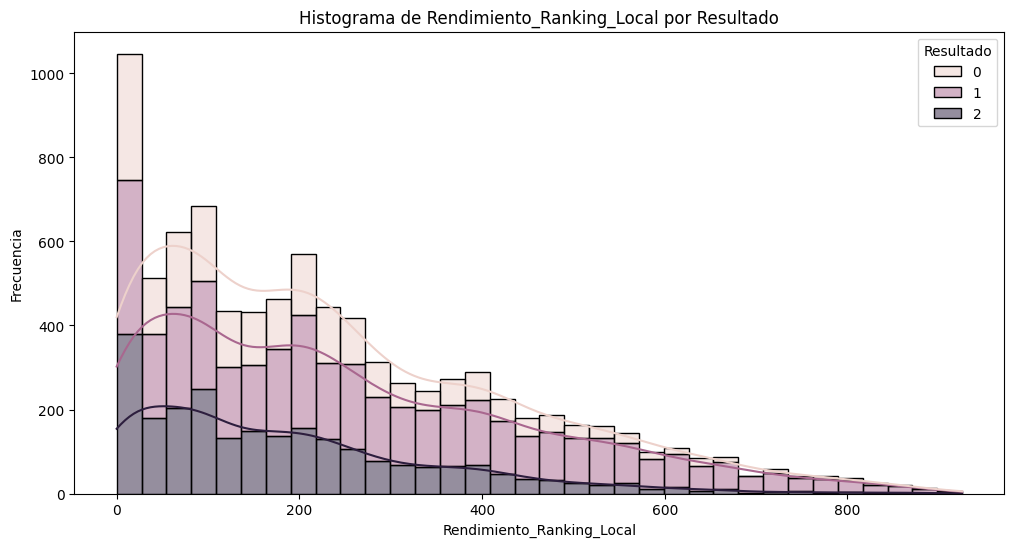

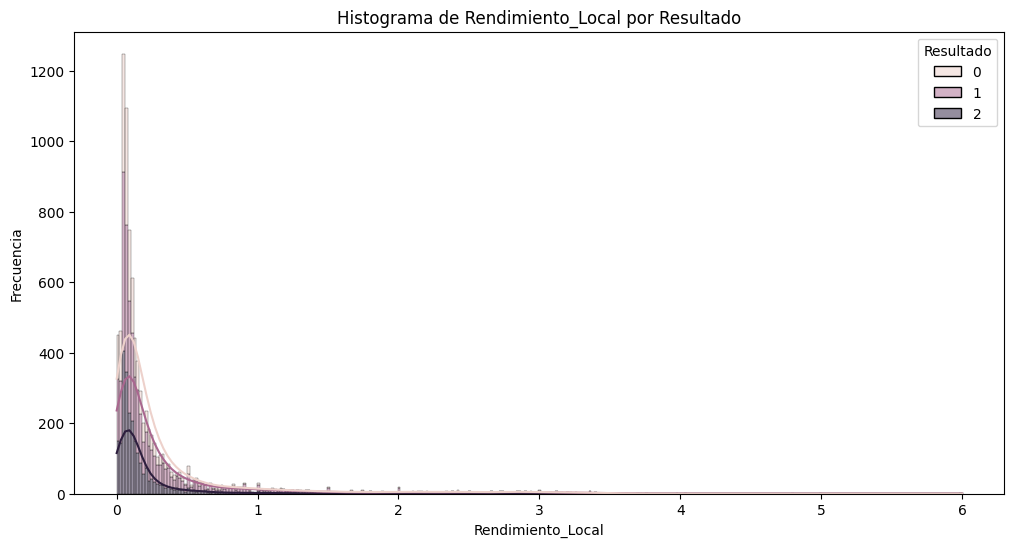

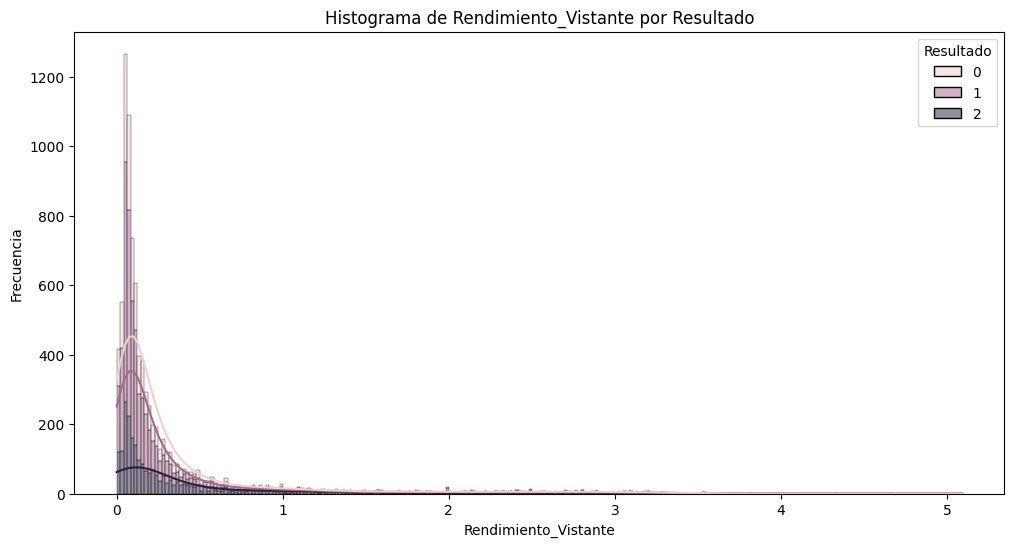

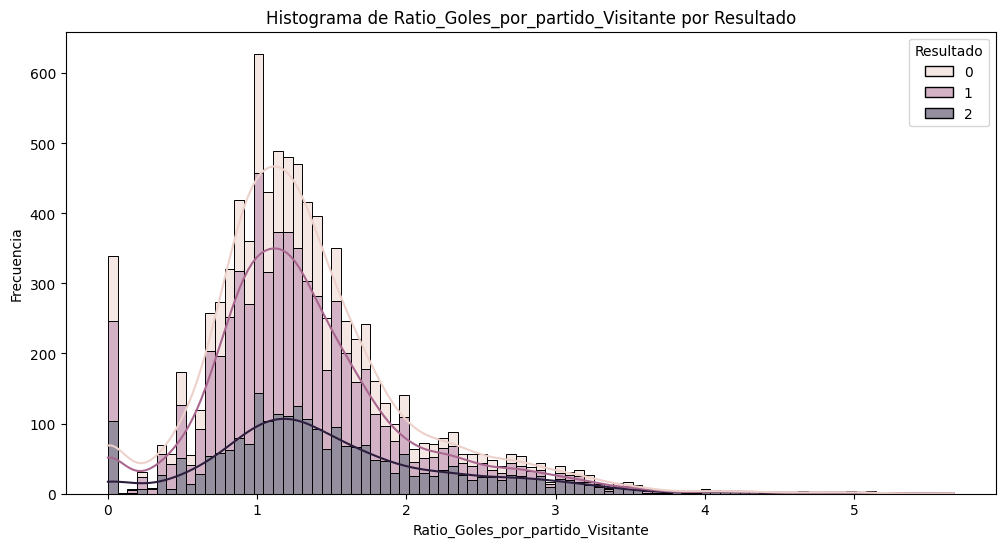

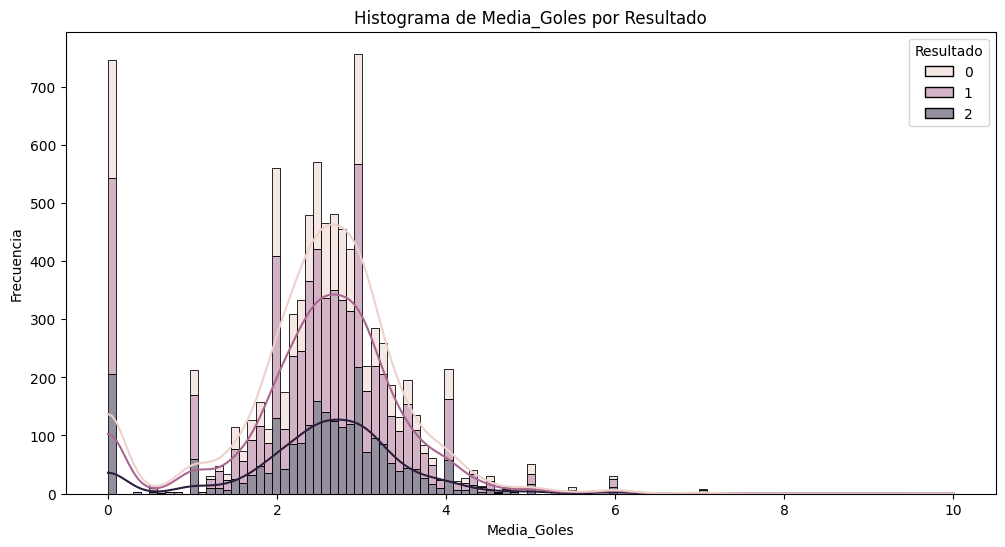

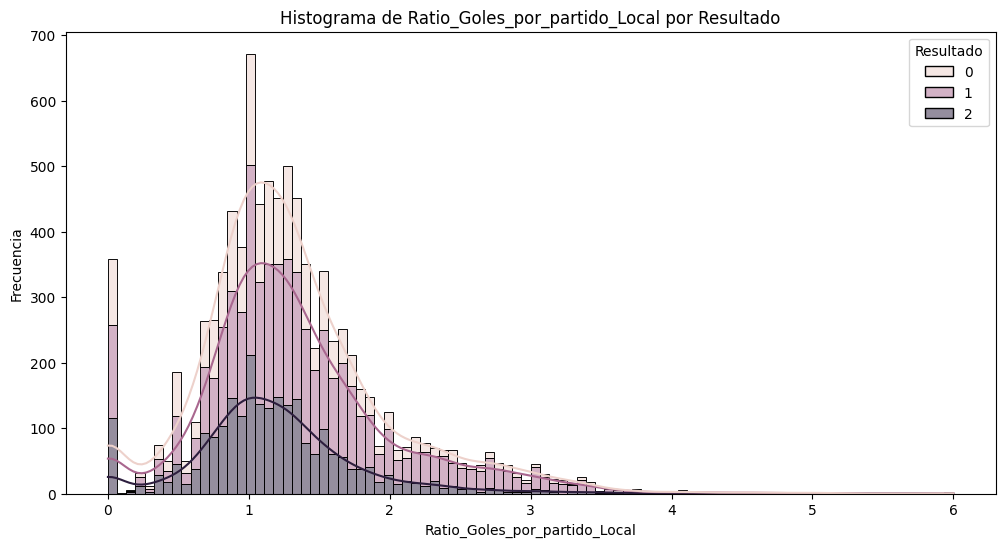

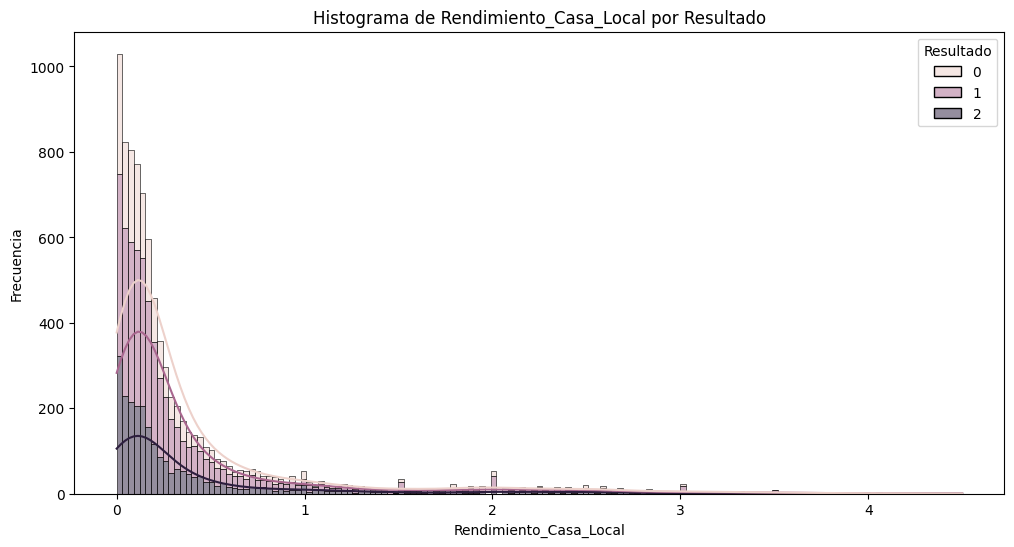

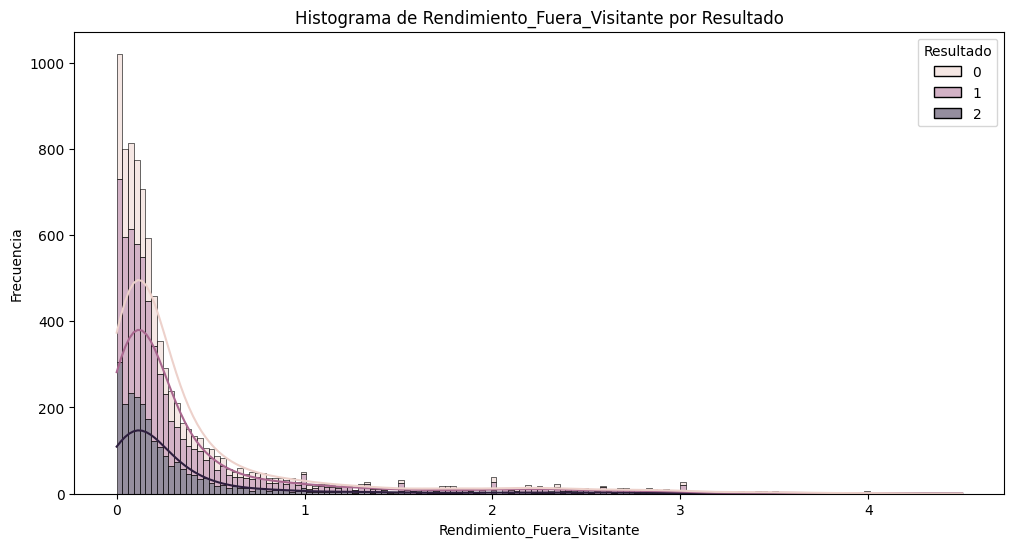

In [ ]:
# Histogramas para cada variable importante
for feature in important_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=encoded, x=feature, hue='Resultado', multiple='stack', kde=True)
    plt.title(f'Histograma de {feature} por Resultado')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()
